In [12]:
import numpy as np
import pandas as pd
import ast
from collections import Counter

# Plotting liberaries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


from scipy.stats import chi2_contingency
from scipy.stats.stats import pearsonr

# upsupervised liberaries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Stop warnings
import warnings

warnings.filterwarnings("ignore")

# Once loaded, automatically format syntactically correct jupyter cells once they are run.
# import jupyter_black

# jupyter_black.load()

C:\Users\namra\AppData\Local\Temp\ipykernel_31592\2189922268.py:13: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Movies are perceived as a major form of entertainment, art, and storytelling in contemporary society. They are created and consumed across various platforms, including theaters, television, streaming services, and digital media. Movies continue to be a significant source of revenue for various stakeholders in the entertainment industry, such as film studios, producers, distributors, and streaming platforms. Revenue is generated through box office ticket sales, streaming subscriptions, merchandise, licensing, and international distribution. 

In this report, we will investigate whether there is a discernible formula for the success of certain movies and how we can measure that success. We will explore whether revenue is the sole determining factor or if IMDb ratings hold an equal significance in evaluating a movie's success. By analyzing various aspects of movie data, we aim to gain insights into the complex factors that contribute to a movie's overall success and whether financial success aligns with critical acclaim on platforms like IMDb.

In [2]:
df = pd.read_csv('data/movies.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

| Column Name                                     | Description                                                                                                                                                            | Possible Values or Range              |
|-----------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------|
| `<rating>` | Motion Picture Association of America (MPAA) rating provides information about the content and suitability of movies for different audiences. | G, PG, PG-13, R, NC-17          |
| `<genre>`                                | Genre category of the movie.                                                                                                                                          | Adventure, Action, Comedy, Horror, Biography, Drama, Crime, Fantasy, Family, Sci-Fi, Animation, Thriller, Western, Romance, Mystery, Sport |
| `<year>`                          | The year in which the movie was released.                                                                                                                              | 1980 to 2020                        |
| `<released>`                     | Release date of the movie along with the country.                                                                                                                      | Varies                              |
| `<score>`                          | IMDb score or rating for the movie.                                                                                                                                    | Numeric value                       |
| `<votes>`                     | The number of users who have voted for the movie.                                                                                                                      | Numeric value                       |
| `<director>`                    | Name of the Director of the movie.                                                                                                                                     | Text                                |
| `<writer>`                        | Name of the writer of the movie.                                                                                                                                       | Text                                |
| `<star>`                           | Name of the main actor or actress in the movie.                                                                                                                        | Text                                |
| `<country>`             | The country where the movie was produced.                                                                                                                              | Varies                              |
| `<budget>`                       | Total budget allocated for the movie's production.                                                                                                                      | Numeric value                       |
| `<gross>`                       | Total gross revenue earned by the movie.                                                                                                                               | Numeric value                       |
| `<company>`                | Name of the production company responsible for the movie.                                                                                                               | Text                                |
| `<runtime>`                    | Duration of the movie in minutes.                                                                                                                                      | Numeric value                       |


## I- Data Cleaning

<!-- 1. Treat country column : removing the country data apart from the US
2. Drop duplicates
3. Treat missing values
4. Outliers
5.  -->

### 1. Removing other country data apart from the US

In [4]:
#Removing other country data

df = df.loc[df["country"] == "United States"]
df.drop(columns = ['country'], inplace = True)

### 2. Duplicates

In [5]:
#Checking for duplicates in the movie names/index 
print(f"We have {df.duplicated().sum()} duplicated movies in the dataset")

We have 0 duplicated movies in the dataset


### 3. Missing values

In [6]:
#Calculation the number of missing values in each column
display(df.isnull().sum())

name           0
rating        18
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         0
star           0
budget      1099
gross         98
company       12
runtime        2
dtype: int64

In [7]:
#Dropping the rows with missing values in gross, rating, votes, score, and runtime except 'budget'.
movies = df.dropna(subset=df.columns.difference(['budget']))

In [8]:
subset_df = df[df['budget'].isnull()]
display(df.describe())
display(subset_df.describe())

year        score         votes        budget         gross  \
count  5475.000000  5472.000000  5.472000e+03  4.376000e+03  5.377000e+03   
mean   1999.875251     6.257072  9.514750e+04  3.694391e+07  8.991236e+07   
std      11.048799     0.949104  1.702746e+05  4.246731e+07  1.768750e+08   
min    1980.000000     1.900000  1.400000e+01  3.000000e+03  3.090000e+02   
25%    1990.000000     5.700000  9.300000e+03  1.000000e+07  6.808550e+06   
50%    2000.000000     6.300000  3.600000e+04  2.200000e+07  2.641216e+07   
75%    2009.000000     6.900000  1.030000e+05  4.600000e+07  9.341371e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  5473.000000  
mean    105.801206  
std      16.784244  
min      63.000000  
25%      94.000000  
50%     103.000000  
75%     114.000000  
max     271.000000

year        score          votes  budget         gross  \
count  1099.000000  1099.000000    1099.000000     0.0  1.051000e+03   
mean   1994.483167     5.988990   13863.227480     NaN  1.193712e+07   
std      11.267182     0.876903   21877.560391     NaN  2.028830e+07   
min    1980.000000     1.900000      14.000000     NaN  6.820000e+02   
25%    1986.000000     5.500000    2000.000000     NaN  1.181728e+06   
50%    1991.000000     6.100000    6000.000000     NaN  4.994094e+06   
75%    2001.000000     6.600000   16000.000000     NaN  1.481675e+07   
max    2020.000000     8.000000  217000.000000     NaN  2.536254e+08   

           runtime  
count  1099.000000  
mean    100.311192  
std      11.929650  
min      72.000000  
25%      92.000000  
50%      99.000000  
75%     107.000000  
max     188.000000

We notice that the distribution in the votes column is very different so we explore. 

In [9]:
from scipy.stats import ks_2samp

subset_df = movies[movies["budget"].isnull()]

statistic, p_value = ks_2samp(
    movies["votes"],
    subset_df["votes"],
)
if p_value < 0.05:
    print("The two samples have different distributions (reject H0).")
else:
    print("The two samples have the same distribution (fail to reject H0).")

The two samples have different distributions (reject H0).


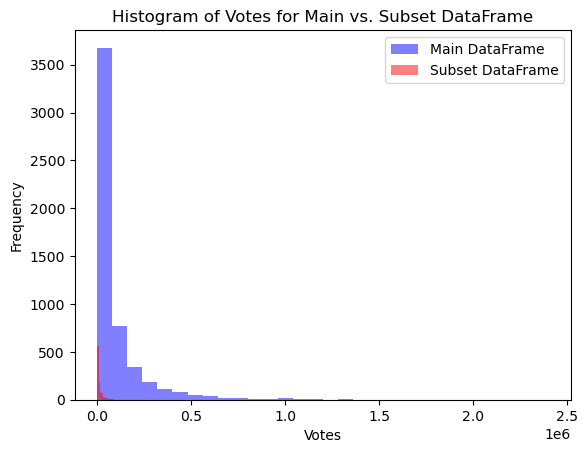

In [10]:
plt.hist(movies["votes"], bins=30, alpha=0.5, label="Main DataFrame", color="blue")

plt.hist(
    subset_df["votes"].dropna(),
    bins=30,
    alpha=0.5,
    label="Subset DataFrame",
    color="red",
)

plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.title("Histogram of Votes for Main vs. Subset DataFrame")
plt.legend()
plt.show()

So, the votes in the subset_df are significantly low. Let's explore some of the categorical variables and check the distribution.

In [11]:
display(movies["genre"].value_counts())
display(subset_df["genre"].value_counts())
display(movies["rating"].value_counts())
display(subset_df["rating"].value_counts())

Comedy       1769
Action       1276
Drama         877
Crime         372
Adventure     276
Biography     246
Horror        234
Animation     234
Fantasy        33
Mystery        15
Family          8
Thriller        8
Sci-Fi          5
Romance         3
Western         1
Sport           1
Name: genre, dtype: int64

Comedy       456
Drama        249
Action       127
Crime         61
Adventure     47
Biography     41
Horror        29
Animation     20
Family         4
Thriller       2
Mystery        2
Sport          1
Name: genre, dtype: int64

R            2553
PG-13        1670
PG            957
G             105
Not Rated      39
Unrated        22
NC-17           7
TV-MA           3
Approved        1
TV-PG           1
Name: rating, dtype: int64

R            519
PG           229
PG-13        223
Not Rated     28
G             25
Unrated       10
NC-17          2
TV-MA          2
TV-PG          1
Name: rating, dtype: int64

Performing a chi2 test to confirm the difference in the distribution.


In [12]:
from scipy.stats import chi2_contingency


contingency_genre = pd.crosstab(movies["genre"], subset_df["genre"])
contingency_rating = pd.crosstab(movies["rating"], subset_df["rating"])

p_value_genre= chi2_contingency(contingency_genre)[1]
p_value_rating = chi2_contingency(contingency_rating)[1]


if p_value_genre < 0.05:
    print(
        "The 'genre' distribution is significantly different between the two DataFrames."
    )
else:
    print(
        "The 'genre' distribution is not significantly different between the two DataFrames."
    )

if p_value_rating < 0.05:
    print(
        "The 'rating' distribution is significantly different between the two DataFrames."
    )
else:
    print(
        "The 'rating' distribution is not significantly different between the two DataFrames."
    )

The 'genre' distribution is significantly different between the two DataFrames.
The 'rating' distribution is significantly different between the two DataFrames.


At the glance the distributions of the subset_df looked very similar but has differences with the main df. For the purpose of this analysis, we may still drop the subset_df as we are unable to figure out the reason behind the missing values. An alternate could be to perform webscraping for the missing values. However, for the current analysis we are dropping the rows with the missing values in the budget column.

In [13]:
movies = movies[movies["budget"].isnull() == False]

### 4. New Columns

In [14]:
# create new feature ROI, Profit and Average Score
movies["roi"] = movies["gross"]/movies["budget"]
movies['profit'] = movies['gross'] - movies['budget']

In [15]:
#create a new categorical feature for roi

# add the min value of the "roi" to cat list
cat = [np.min(movies["roi"])]

# add 4 quantille (0.20, 0.40, 0.60, 0.80) of the "roi" to cat list
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(movies["roi"].quantile(i))

# add the max value of the "roi" to cat list
cat.append(np.max(movies["roi"]))

movies["roi_cat"] = pd.cut(
    movies["roi"], bins=cat, labels=[1, 2, 3, 4, 5], include_lowest=True
)

In [16]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def check_month(df):
    Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month_list = []

    for date in df['released']:
        # Extract the first word from the 'released' column
        first_word = date.split()[0]

        if first_word in Months:
            month_list.append(first_word)
        else:
            month_list.append(0)
    return month_list

# Assuming df is your DataFrame, call the function to extract the months
month_list = check_month(movies)

In [17]:
movies['month'] = month_list
movies['month'].value_counts()

August       424
October      405
July         380
November     375
December     373
March        363
June         355
September    343
April        337
January      328
May          317
February     315
0              4
Name: month, dtype: int64

In [18]:
movies = movies[movies['month'] != 0]

In [19]:
# check if we delete rows too much 
# Convert the date to a datetime format
movies['released_date'] = movies['released'].str.split('(').str[0]
# there is obersavstions do not have day, only have month and year, we should drop them 
movies = movies[movies['released'].str.contains(',', na=False)]

In [20]:
movies["released_date"] = pd.to_datetime(movies["released"].str.split(" \(").str[0])

def is_weekend(date):
    return date.weekday() >= 4

movies["weekends"] = movies["released_date"].apply(is_weekend).astype(int)

In [21]:
movies['day'] = movies['released_date'].dt.day

In [22]:
try:
    import holidays  
except:
    !pip install holidays
    import holidays

holiday = []
us_holidays = holidays.US()
for date in movies['released_date']:
    if date in us_holidays:
        holiday.append(1)
    else:
        holiday.append(0)
movies['holiday'] = holiday

In [23]:
movies['holiday'] = movies['holiday'].astype('object')
movies['weekends'] = movies['weekends'].astype('object')
movies['roi_cat'] = movies['roi_cat'].astype('object')

In [24]:
movies = movies.drop(columns=["released", "released_date"])

In [25]:
movies.describe()

year        score         votes        budget         gross  \
count  4310.000000  4310.000000  4.310000e+03  4.310000e+03  4.310000e+03   
mean   2001.353828     6.335800  1.171504e+05  3.744741e+07  1.092324e+08   
std      10.483611     0.948571  1.854877e+05  4.258676e+07  1.924812e+08   
min    1980.000000     1.900000  1.950000e+02  7.000000e+03  3.090000e+02   
25%    1993.000000     5.800000  1.800000e+04  1.000000e+07  1.213230e+07   
50%    2002.000000     6.400000  5.300000e+04  2.225000e+07  4.096866e+07   
75%    2010.000000     7.000000  1.330000e+05  4.800000e+07  1.220873e+08   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime           roi        profit          day  
count  4310.000000   4310.000000  4.310000e+03  4310.000000  
mean    107.336427      7.513420  7.178499e+07    15.919258  
std      17.544970    206.367982  1.634311e+08     8.470690  
min      63.000000      0.000021 -1.580311e+08     1.000000  
25%      95.000000      0.805758 -2.247475e+06     9.000000  
50%     104.000000      1.957412  1.649933e+07    16.000000  
75%     116.000000      3.764512  7.688131e+07    23.000000  
max     271.000000  12890.386667  2.610246e+09    31.000000

### 5. Drop useless columns & rows

In [26]:
# Calculate the count of each category
category_counts = movies['genre'].value_counts()

# Find categories with counts >= 50
valid_categories = category_counts[category_counts >= 50].index

# Filter the DataFrame to keep only rows with valid categories
filtered_df = movies[movies['genre'].isin(valid_categories)]   

# Calculate the count of each rating category
category_counts = filtered_df['rating'].value_counts()

# Find rating categories with counts >= 100
valid_categories = category_counts[category_counts >= 100].index

# Filter the DataFrame to keep only rows with valid categories
movies_cl = filtered_df[filtered_df['rating'].isin(valid_categories)]  

In [27]:
threshold = 10

# Create a mask for identifying extreme values
outliers = movies["roi"] > threshold

# Drop rows with extreme values
movies_cl = movies_cl[~outliers]   

In [28]:
print("""We drop released and released_date column, and drop rows for rating counts <100, genre counts <50, and ROI >10.""")

We drop released and released_date column, and drop rows for rating counts <100, genre counts <50, and ROI >10.


In [29]:
movies_cl = movies_cl[['name', 'rating', 'genre',  'score', 'votes',  'budget', 'gross', 'roi','roi_cat','profit', 'runtime', 
        'month', 'day', 'year', 'holiday', 'weekends', 'company','director',
       'writer', 'star']]

# # Create and save the cleaned dataset to a new CSV file 
# movies_cleaned.to_csv('data/cleaned_movies.csv', index=False)

In [30]:
movies_cl.info()
movies_cl.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 4 to 7650
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      3912 non-null   object 
 1   rating    3912 non-null   object 
 2   genre     3912 non-null   object 
 3   score     3912 non-null   float64
 4   votes     3912 non-null   float64
 5   budget    3912 non-null   float64
 6   gross     3912 non-null   float64
 7   roi       3912 non-null   float64
 8   roi_cat   3912 non-null   object 
 9   profit    3912 non-null   float64
 10  runtime   3912 non-null   float64
 11  month     3912 non-null   object 
 12  day       3912 non-null   int64  
 13  year      3912 non-null   int64  
 14  holiday   3912 non-null   object 
 15  weekends  3912 non-null   object 
 16  company   3912 non-null   object 
 17  director  3912 non-null   object 
 18  writer    3912 non-null   object 
 19  star      3912 non-null   object 
dtypes: float64(7), int64(2), objec

name        0
rating      0
genre       0
score       0
votes       0
budget      0
gross       0
roi         0
roi_cat     0
profit      0
runtime     0
month       0
day         0
year        0
holiday     0
weekends    0
company     0
director    0
writer      0
star        0
dtype: int64

## II- Exploratory Data Analysis

In [31]:
movies_cat = movies_cl.select_dtypes(include=['object', 'category'])

movies_num = movies_cl.select_dtypes(include=['number'])

### 1. Qualitative Analysis

#### Overview of all qualitative variables

In [32]:
movies_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 4 to 7650
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      3912 non-null   object
 1   rating    3912 non-null   object
 2   genre     3912 non-null   object
 3   roi_cat   3912 non-null   object
 4   month     3912 non-null   object
 5   holiday   3912 non-null   object
 6   weekends  3912 non-null   object
 7   company   3912 non-null   object
 8   director  3912 non-null   object
 9   writer    3912 non-null   object
 10  star      3912 non-null   object
dtypes: object(11)
memory usage: 366.8+ KB


#### Summary tables for all cat columns

In [33]:
movies_cat.columns

Index(['name', 'rating', 'genre', 'roi_cat', 'month', 'holiday', 'weekends',
       'company', 'director', 'writer', 'star'],
      dtype='object')

In [34]:
for column_name in movies_cat.columns[1:6]:
    summary_table = pd.DataFrame(movies_cat[column_name].value_counts(),index=movies_cat[column_name].value_counts().index)
    print(f"\n{column_name}'s summary table:")
    print(summary_table) 


rating's summary table:
       rating
R        1862
PG-13    1367
PG        683

genre's summary table:
           genre
Comedy      1223
Action      1116
Drama        565
Crime        298
Adventure    206
Biography    195
Horror       158
Animation    151

roi_cat's summary table:
   roi_cat
2      844
3      831
1      827
4      820
5      590

month's summary table:
           month
August       383
October      368
December     346
March        337
July         336
November     324
September    316
June         311
January      305
April        304
May          293
February     289

holiday's summary table:
   holiday
0     3805
1      107


In [35]:
for col in ['company', 'director', 'writer', 'star']:
    top_5 = movies[col].value_counts().head(5)
    table = pd.DataFrame({col: top_5.index, 'Counts': top_5.values})
    print("\n",table)


                  company  Counts
0     Universal Pictures     280
1      Columbia Pictures     272
2           Warner Bros.     256
3     Paramount Pictures     248
4  Twentieth Century Fox     189

             director  Counts
0     Clint Eastwood      30
1        Woody Allen      29
2   Steven Spielberg      27
3         Ron Howard      20
4  Steven Soderbergh      19

               writer  Counts
0        Woody Allen      28
1       Stephen King      27
2        John Hughes      20
3         Wes Craven      11
4  Quentin Tarantino      11

              star  Counts
0    Nicolas Cage      36
1       Tom Hanks      36
2    Bruce Willis      33
3  Robert De Niro      32
4      Tom Cruise      31


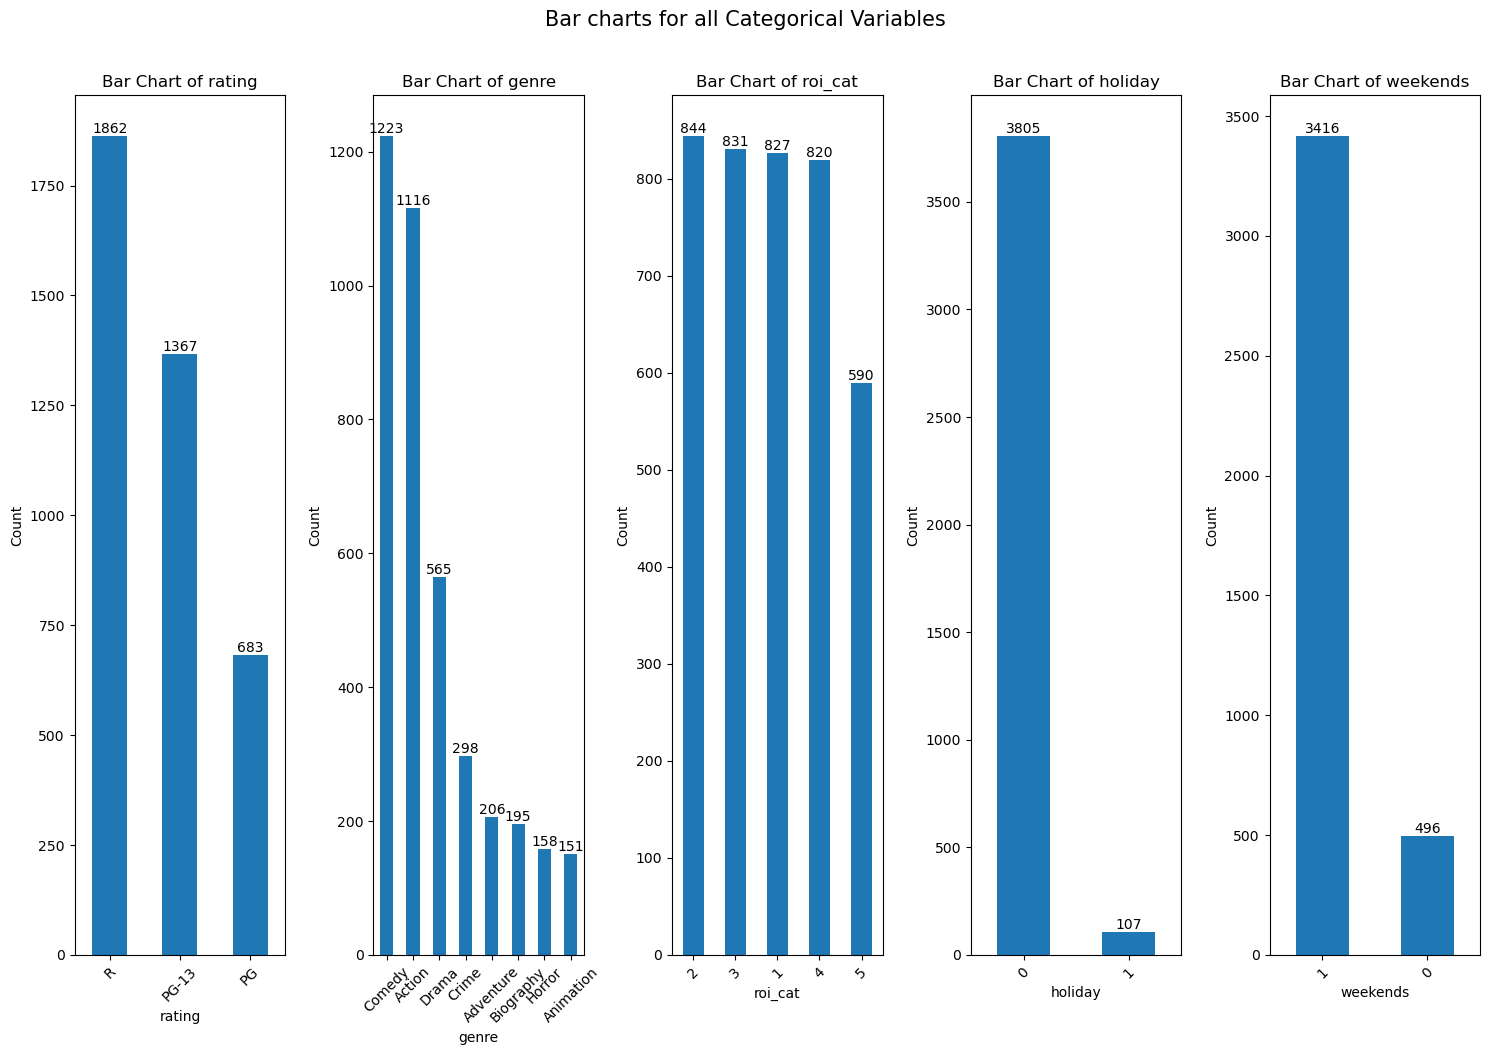

In [36]:
# Plotting bar charts for categorical data
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 10))

for i, column in enumerate(movies_cat[['rating', 'genre', 'roi_cat', 'holiday', 'weekends']]):
    ax = axes[i]

    count = movies_cat[column].value_counts()
    count.plot(kind="bar", ax=ax, rot=45)
    ax.set_title(f"Bar Chart of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

    for j, count in enumerate(count):
        ax.annotate(count, xy=(j, count), ha="center", va="bottom")

fig.tight_layout()
plt.suptitle(
    "Bar charts for all Categorical Variables",
    fontsize=15,
    y=1.05,
)
plt.show()

#### Chi-square test & Cramer’s V: the significance of the relationship between rating and genre using 

In [37]:
movies_cat.columns

Index(['name', 'rating', 'genre', 'roi_cat', 'month', 'holiday', 'weekends',
       'company', 'director', 'writer', 'star'],
      dtype='object')

In [38]:
columns = movies_cat[[ 'genre','holiday', 'weekends', 'rating', 'roi_cat']].columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        movies_obs = pd.crosstab(movies_cat[column1], movies_cat[column2])
        chi2, p_value, dof, expected = chi2_contingency(movies_obs)     
        movies_exp = chi2_contingency(movies_obs)[3]
        movies_res = (movies_obs - expected) /(movies_exp)**0.5
        
        X2 = chi2_contingency(movies_obs)[0]
        N = len(movies)   
        minimum_dimension = min(movies_obs.shape)-1
        Cramers_V = round(np.sqrt((X2/N) / minimum_dimension),2)
        
 
        if p_value < 0.05 and Cramers_V >= 0.1:
            print(f"Contingency table for obervation between {column1} and {column2}:\n")
            display(movies_obs)
            print(f"Contingency table for expectation between {column1} and {column2}:\n")
            display(pd.DataFrame(movies_exp)) 
            print(f"The p-value from chi-square test between {column1} and {column2} is {p_value}, since it is smaller than the significance level, we should reject the null hypithesis, {column1} and {column2} are linked." )
            if Cramers_V >= 0.1 and Cramers_V < 0.3 :
                print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.1 and 0.3,the strength of the relationship between is small.")
            elif Cramers_V >= 0.3 and Cramers_V < 0.5 :
                print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.3 and 0.5,the strength of the relationship between is moderate.")
            elif Cramers_V >= 0.5 and Cramers_V < 0.7 :
                print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.5 and 0.7,the strength of the relationship between is strong.")
            elif Cramers_V >= 0.7 and Cramers_V < 0.9 :
                print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.3 and 0.5,the strength of the relationship between is very strong.")
            else:
                print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it above 0.9, check if these two variables have colinearity problem.")            
        else:
            print(" ")

 
 
Contingency table for obervation between genre and rating:



rating      PG  PG-13    R
genre                     
Action     105    486  525
Adventure  112     44   50
Animation  139      8    4
Biography   30     62  103
Comedy     237    484  502
Crime        4     32  262
Drama       52    221  292
Horror       4     30  124

Contingency table for expectation between genre and rating:



0           1           2
0  194.843558  389.972393  531.184049
1   35.965746   71.984151   98.050102
2   26.363241   52.765082   71.871677
3   34.045245   68.140337   92.814417
4  213.524796  427.362219  582.112986
5   52.028119  104.132413  141.839468
6   98.643916  197.432260  268.923824
7   27.585378   55.211145   75.203476

The p-value from chi-square test between genre and rating is 2.011386538768701e-237, since it is smaller than the significance level, we should reject the null hypithesis, genre and rating are linked.
The Cramer's V between genre and rating is 0.37, since it between 0.3 and 0.5,the strength of the relationship between is moderate.
Contingency table for obervation between genre and roi_cat:



roi_cat      1    2    3    4    5
genre                             
Action     188  250  281  261  136
Adventure   47   44   39   50   26
Animation    8   16   31   52   44
Biography   50   42   43   30   30
Comedy     260  286  250  227  200
Crime       94   62   62   52   28
Drama      156  118   94  108   89
Horror      24   26   31   40   37

Contingency table for expectation between genre and roi_cat:



0           1           2           3           4
0  235.923313  240.773006  237.064417  233.926380  168.312883
1   43.548569   44.443763   43.759202   43.179959   31.068507
2   31.921524   32.577710   32.075920   31.651329   22.773517
3   41.223160   42.070552   41.422546   40.874233   29.409509
4  258.543200  263.857873  259.793712  256.354806  184.450409
5   62.997444   64.292434   63.302147   62.464213   44.943763
6  119.441462  121.896728  120.019172  118.430470   85.212168
7   33.401329   34.087935   33.562883   33.118609   23.829243

The p-value from chi-square test between genre and roi_cat is 8.968191619816588e-20, since it is smaller than the significance level, we should reject the null hypithesis, genre and roi_cat are linked.
The Cramer's V between genre and roi_cat is 0.1, since it between 0.1 and 0.3,the strength of the relationship between is small.
Contingency table for obervation between holiday and weekends:



weekends    0     1
holiday            
0         452  3353
1          44    63

Contingency table for expectation between holiday and weekends:



0            1
0  482.433538  3322.566462
1   13.566462    93.433538

The p-value from chi-square test between holiday and weekends is 1.1615873203357885e-18, since it is smaller than the significance level, we should reject the null hypithesis, holiday and weekends are linked.
The Cramer's V between holiday and weekends is 0.13, since it between 0.1 and 0.3,the strength of the relationship between is small.
 
 
 
 
Contingency table for obervation between rating and roi_cat:



roi_cat    1    2    3    4    5
rating                          
PG       112  132  164  152  123
PG-13    213  306  311  333  204
R        502  406  356  335  263

Contingency table for expectation between rating and roi_cat:



0           1           2           3           4
0  144.386759  147.354806  145.085123  143.164622  103.008691
1  288.984918  294.925358  290.382669  286.538855  206.168200
2  393.628323  401.719836  395.532209  390.296524  280.823108

The p-value from chi-square test between rating and roi_cat is 1.2005740756703765e-15, since it is smaller than the significance level, we should reject the null hypithesis, rating and roi_cat are linked.
The Cramer's V between rating and roi_cat is 0.1, since it between 0.1 and 0.3,the strength of the relationship between is small.


In [39]:
print("""According to the chi-square test and the Cramer's V, we can see the impacts of genre, holiday and weekend on rating and roi_cat.
For genre, although genre are linked both to rating and roi_cat, but the strength of relationship bewteen genre and rating is higher than that between genre and roi_cat.
For holiday and weekend, both of them are linked to rating and roi_cat, however, the strength of the relationship between holiday, weekend and rating and roi_cat is small or even not significant at all.""")

According to the chi-square test and the Cramer's V, we can see the impacts of genre, holiday and weekend on rating and roi_cat.
For genre, although genre are linked both to rating and roi_cat, but the strength of relationship bewteen genre and rating is higher than that between genre and roi_cat.
For holiday and weekend, both of them are linked to rating and roi_cat, however, the strength of the relationship between holiday, weekend and rating and roi_cat is small or even not significant at all.


### 2. Quantitative Analysis

#### Overview of all quantitative variables

In [40]:
movies_num.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 4 to 7650
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score    3912 non-null   float64
 1   votes    3912 non-null   float64
 2   budget   3912 non-null   float64
 3   gross    3912 non-null   float64
 4   roi      3912 non-null   float64
 5   profit   3912 non-null   float64
 6   runtime  3912 non-null   float64
 7   day      3912 non-null   int64  
 8   year     3912 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 305.6 KB


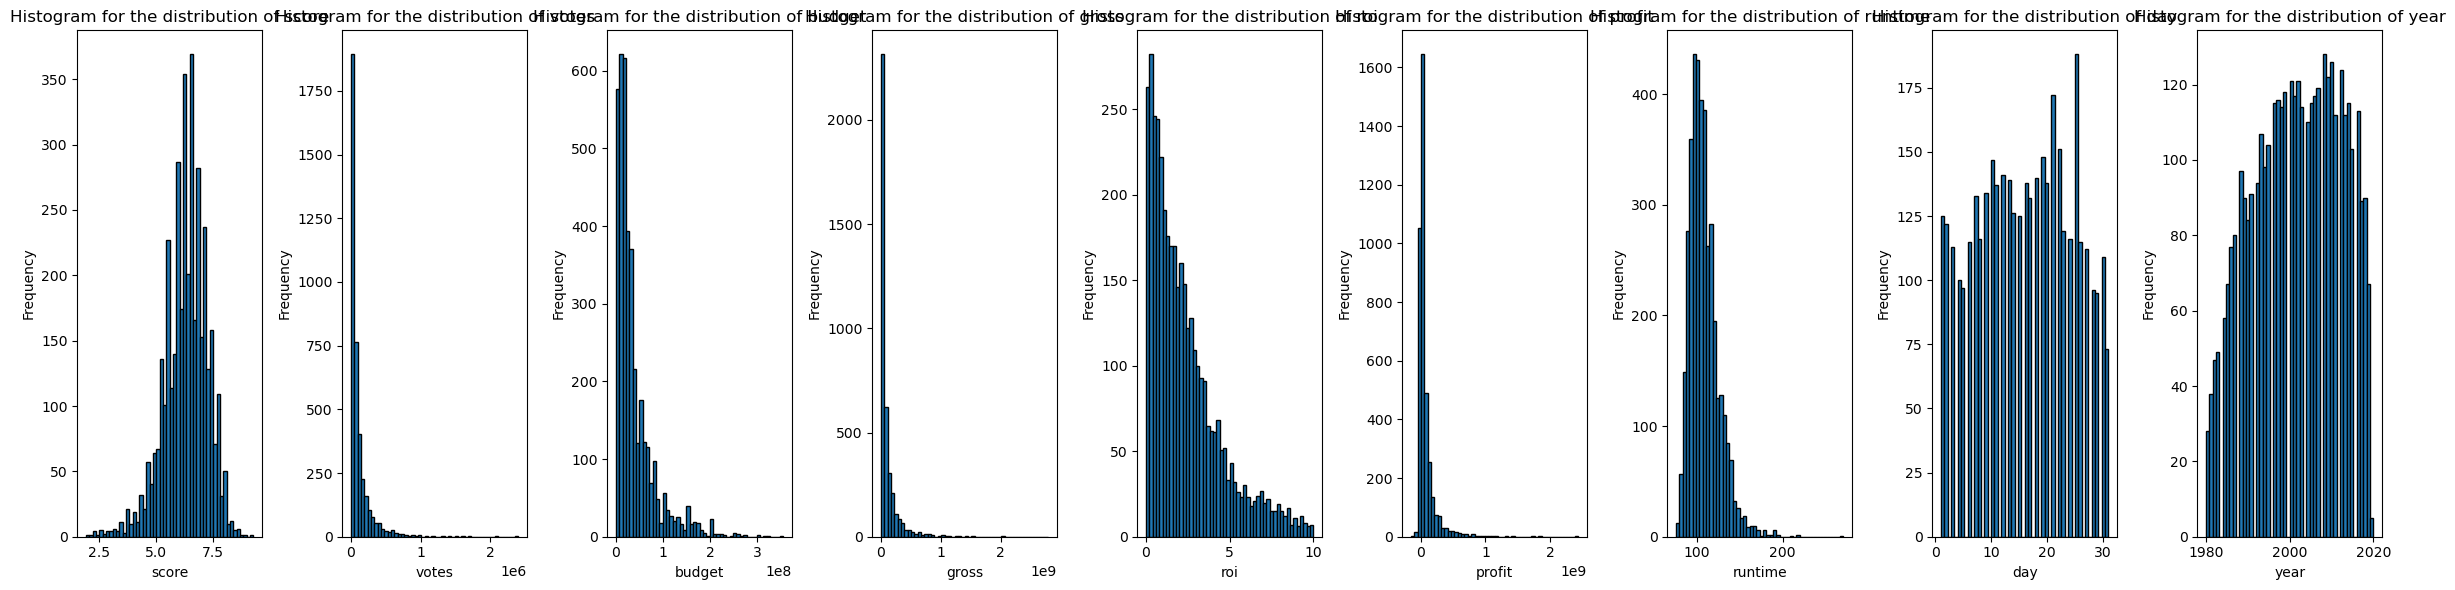

In [41]:
fig, axes = plt.subplots(1, len(movies_num.columns), figsize=(24, 6))

for i, column in enumerate(movies_num.columns):
    axes[i].hist(movies_num[column], bins=50, edgecolor='k')
    axes[i].set_title(f'Histogram for the distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

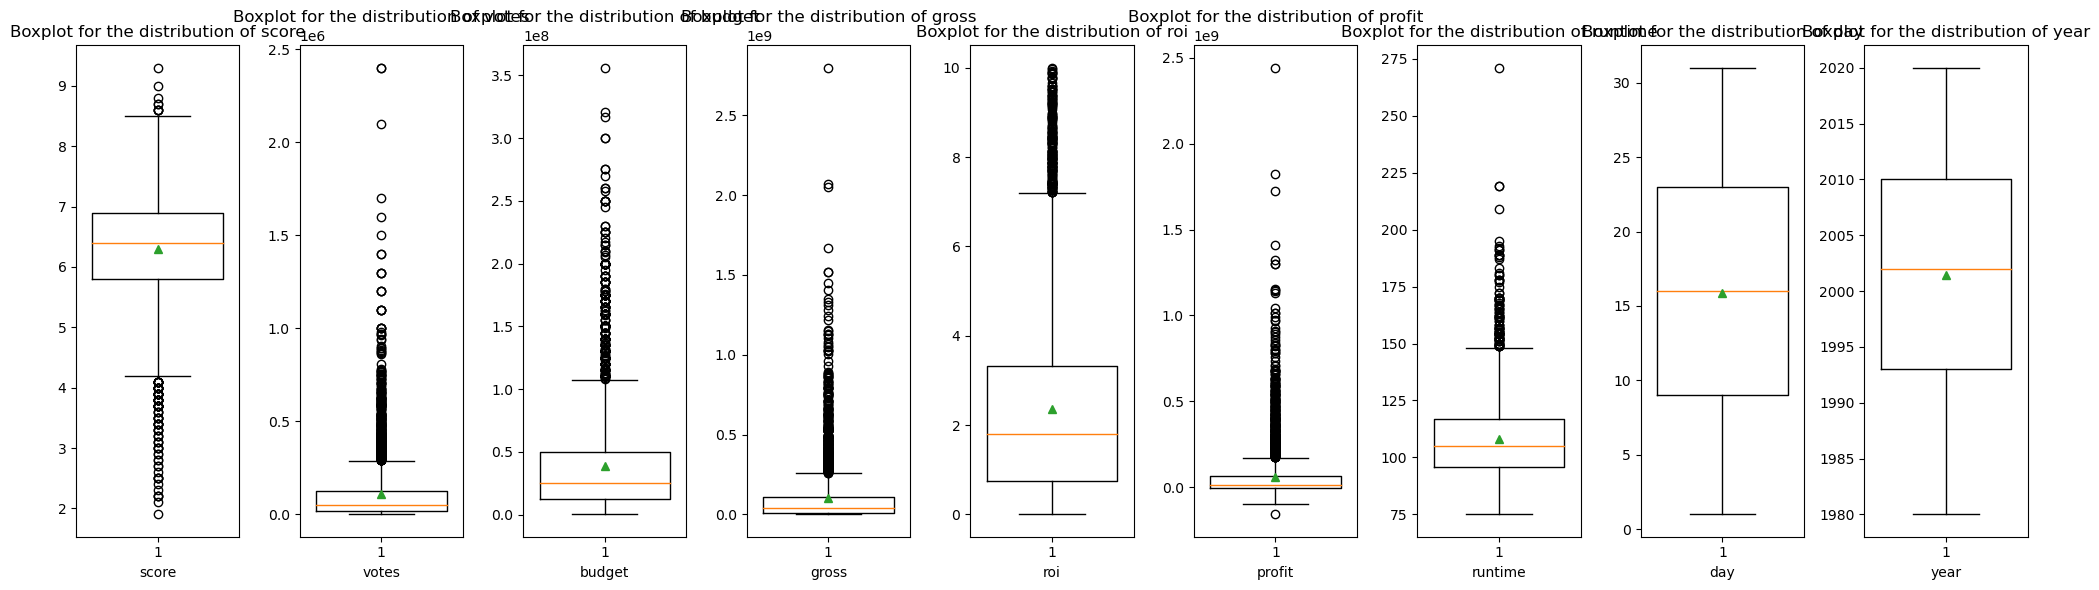

In [42]:
fig, axes = plt.subplots(1, len(movies_num.columns), figsize=(20, 6))

for i, column in enumerate(movies_num.columns):
    axes[i].boxplot(movies_num[column],showmeans=True, widths=0.8)
    axes[i].set_title(f'Boxplot for the distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

#### Correlation test: the significance of their relationship between all quantitative variables with the 

- Pearson Correlation (Pearson's r): 

Pearson's correlation coefficient (usually denoted as "r") measures the linear relationship between two continuous variables. It assumes that the variables follow a normal distribution and that the relationship is linear. Pearson correlation is sensitive to outliers and may not capture non-linear relationships well. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation.

- Spearman Correlation (Spearman's rho):

Spearman's correlation coefficient (Spearman's rho) assesses the strength and direction of the monotonic relationship (either increasing or decreasing) between two variables. It does not assume linearity and can capture non-linear relationships. Spearman correlation is based on the ranks of the data rather than the actual values, making it more robust to outliers. It ranges from -1 (perfect inverse monotonic relationship) to 1 (perfect monotonic relationship), with 0 indicating no monotonic correlation.

In summary, if you are dealing with continuous data and are interested in linear relationships, Pearson correlation is a common choice. However, if your data is not normally distributed, or if you suspect a non-linear relationship, or if you want to assess the strength of monotonic relationships, then Spearman correlation may be more appropriate. It's important to choose the correlation method that best suits your data and the research question at hand.

---------------the correlation table of quantitative variables----------------------------------


score     votes    budget     gross       roi    profit   runtime  \
score    1.000000  0.487425  0.038599  0.198835  0.271067  0.266138  0.429238   
votes    0.487425  1.000000  0.573950  0.765578  0.564929  0.681637  0.313189   
budget   0.038599  0.573950  1.000000  0.753619  0.138203  0.403048  0.359581   
gross    0.198835  0.765578  0.753619  1.000000  0.720319  0.869559  0.298030   
roi      0.271067  0.564929  0.138203  0.720319  1.000000  0.868571  0.086464   
profit   0.266138  0.681637  0.403048  0.869559  0.868571  1.000000  0.176634   
runtime  0.429238  0.313189  0.359581  0.298030  0.086464  0.176634  1.000000   
day      0.004547  0.012908  0.009390  0.000943 -0.002064 -0.005160  0.015256   
year     0.057353  0.470207  0.359572  0.378180  0.202405  0.305638  0.097176   

              day      year  
score    0.004547  0.057353  
votes    0.012908  0.470207  
budget   0.009390  0.359572  
gross    0.000943  0.378180  
roi     -0.002064  0.202405  
profit  -0.005160  0.305638  
runtime  0.015256  0.097176  
day      1.000000  0.014886  
year     0.014886  1.000000

<Axes: >

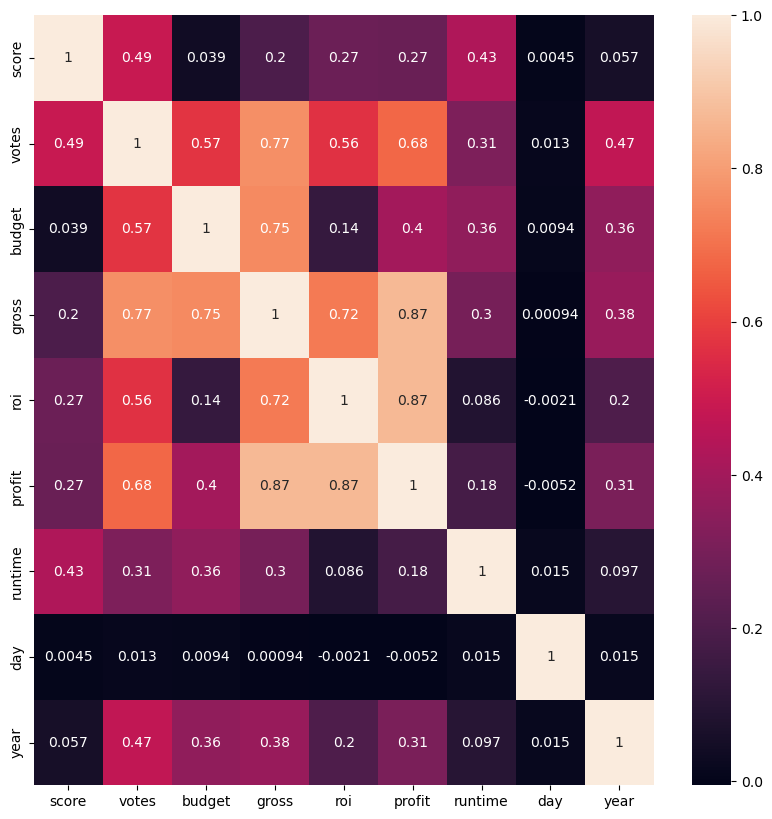

In [43]:
print("---------------the correlation table of quantitative variables----------------------------------")
display(movies_num.corr(method="spearman"))
plt.figure(figsize=(10,10))
sns.heatmap(movies_num.corr(method="spearman"), annot=True)

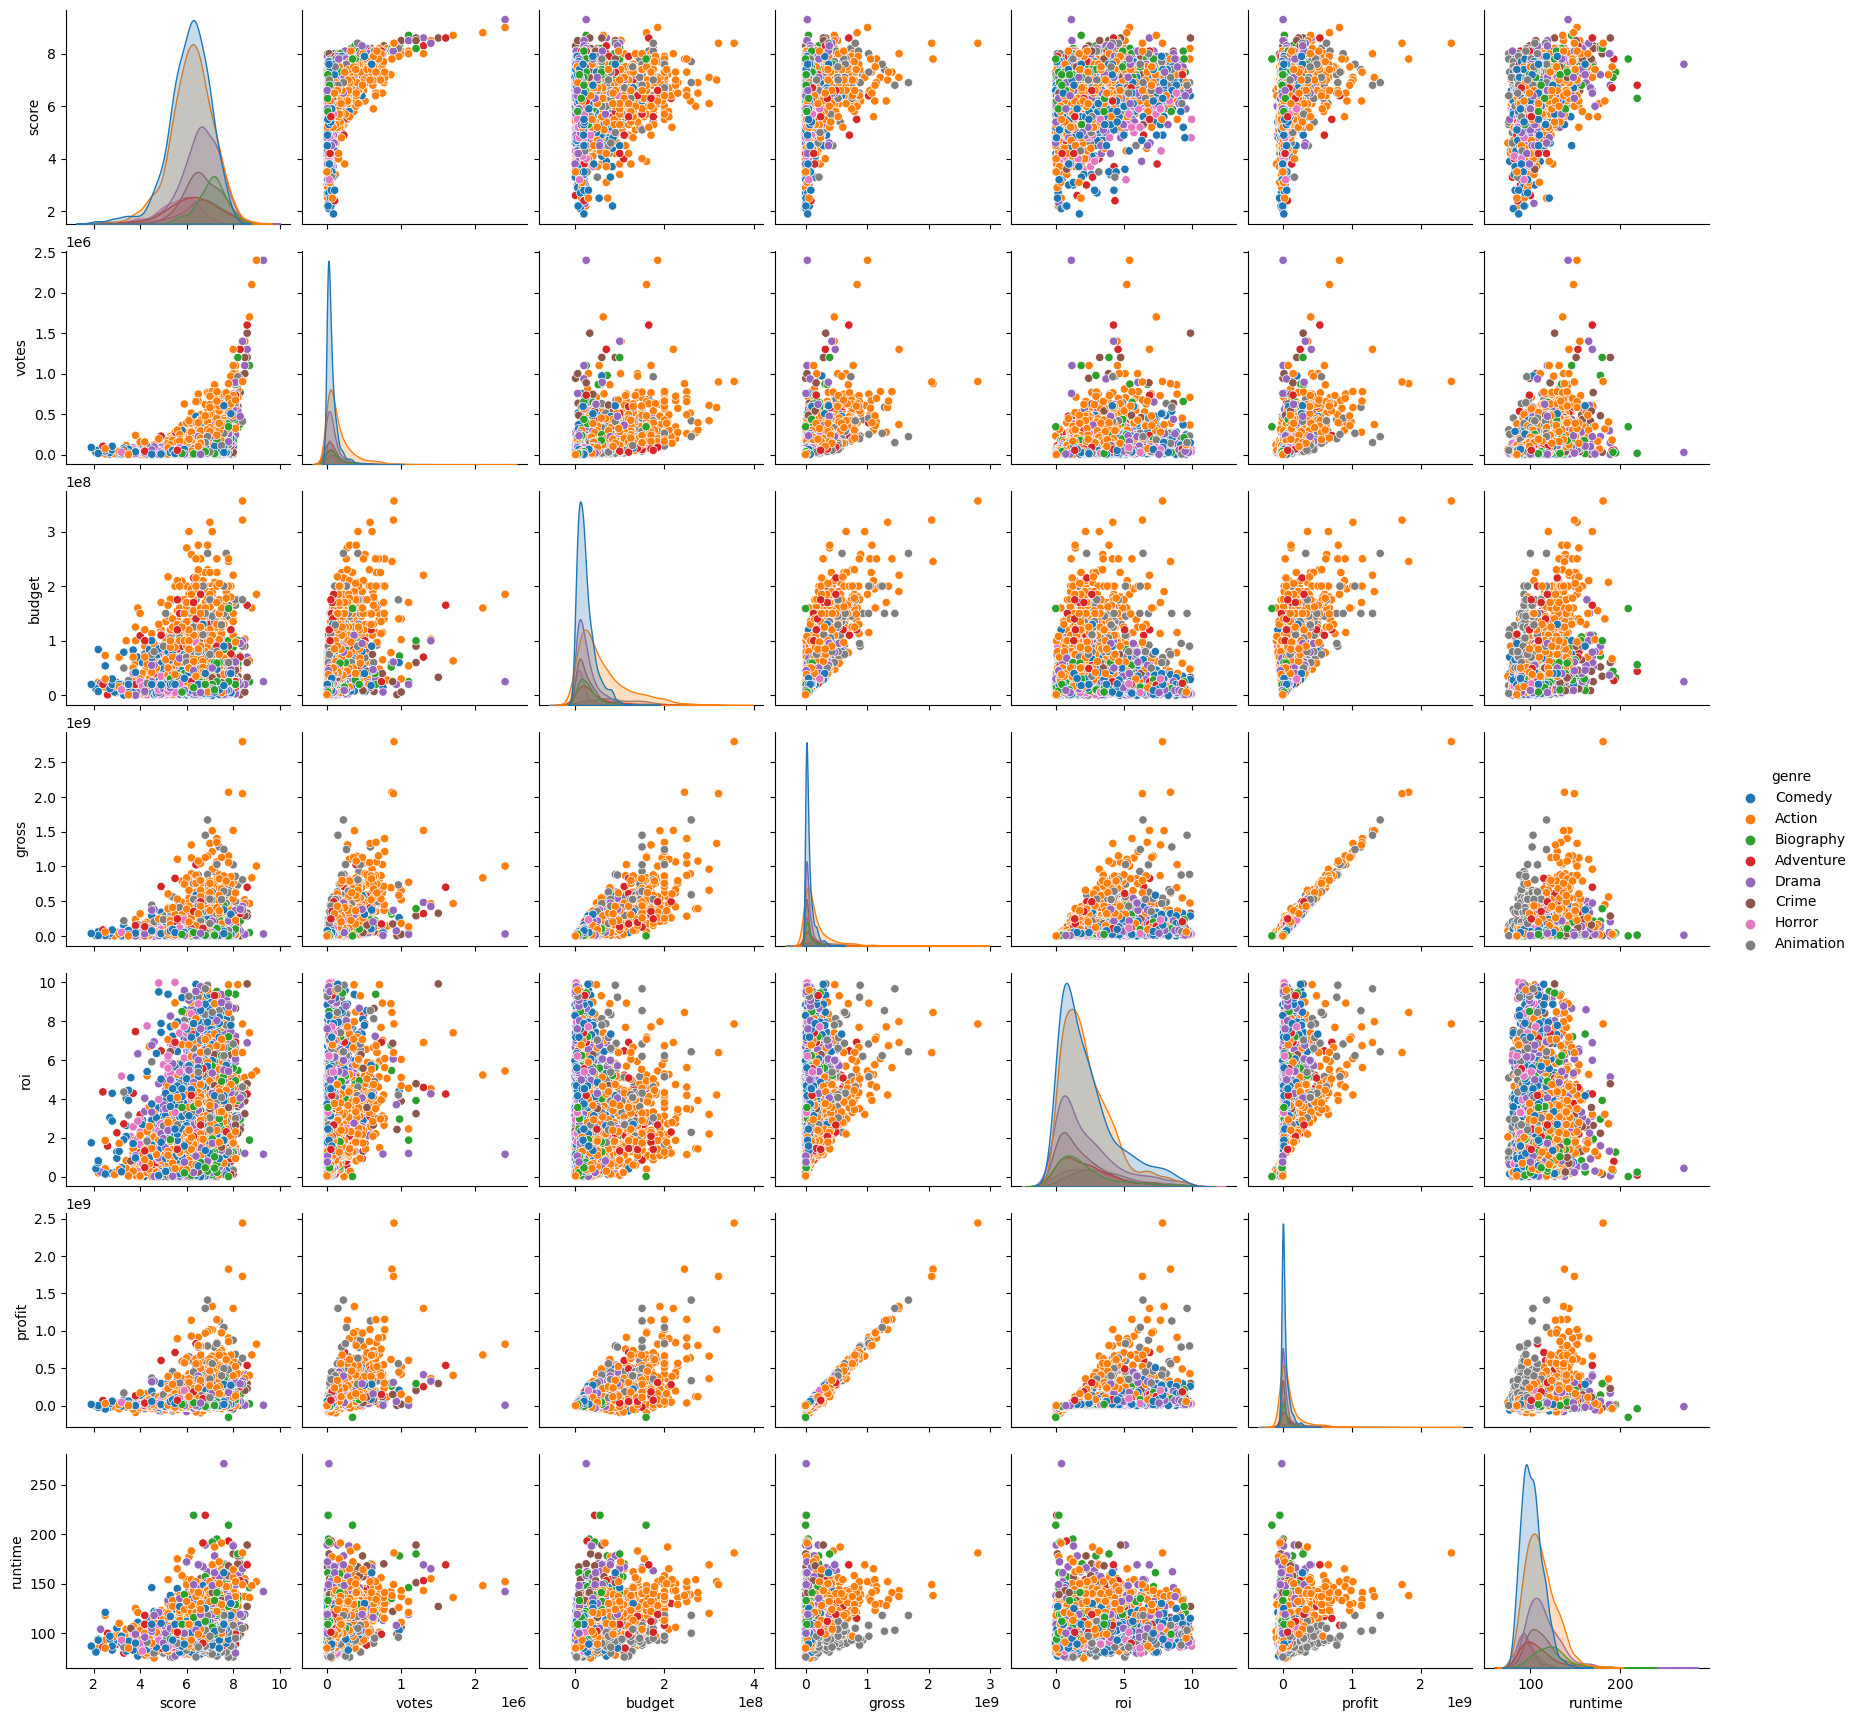

In [44]:
sns.pairplot(movies_cl.drop(columns = ['weekends', 'holiday', 'roi_cat', 'month', 'day', 'year']), hue='genre')

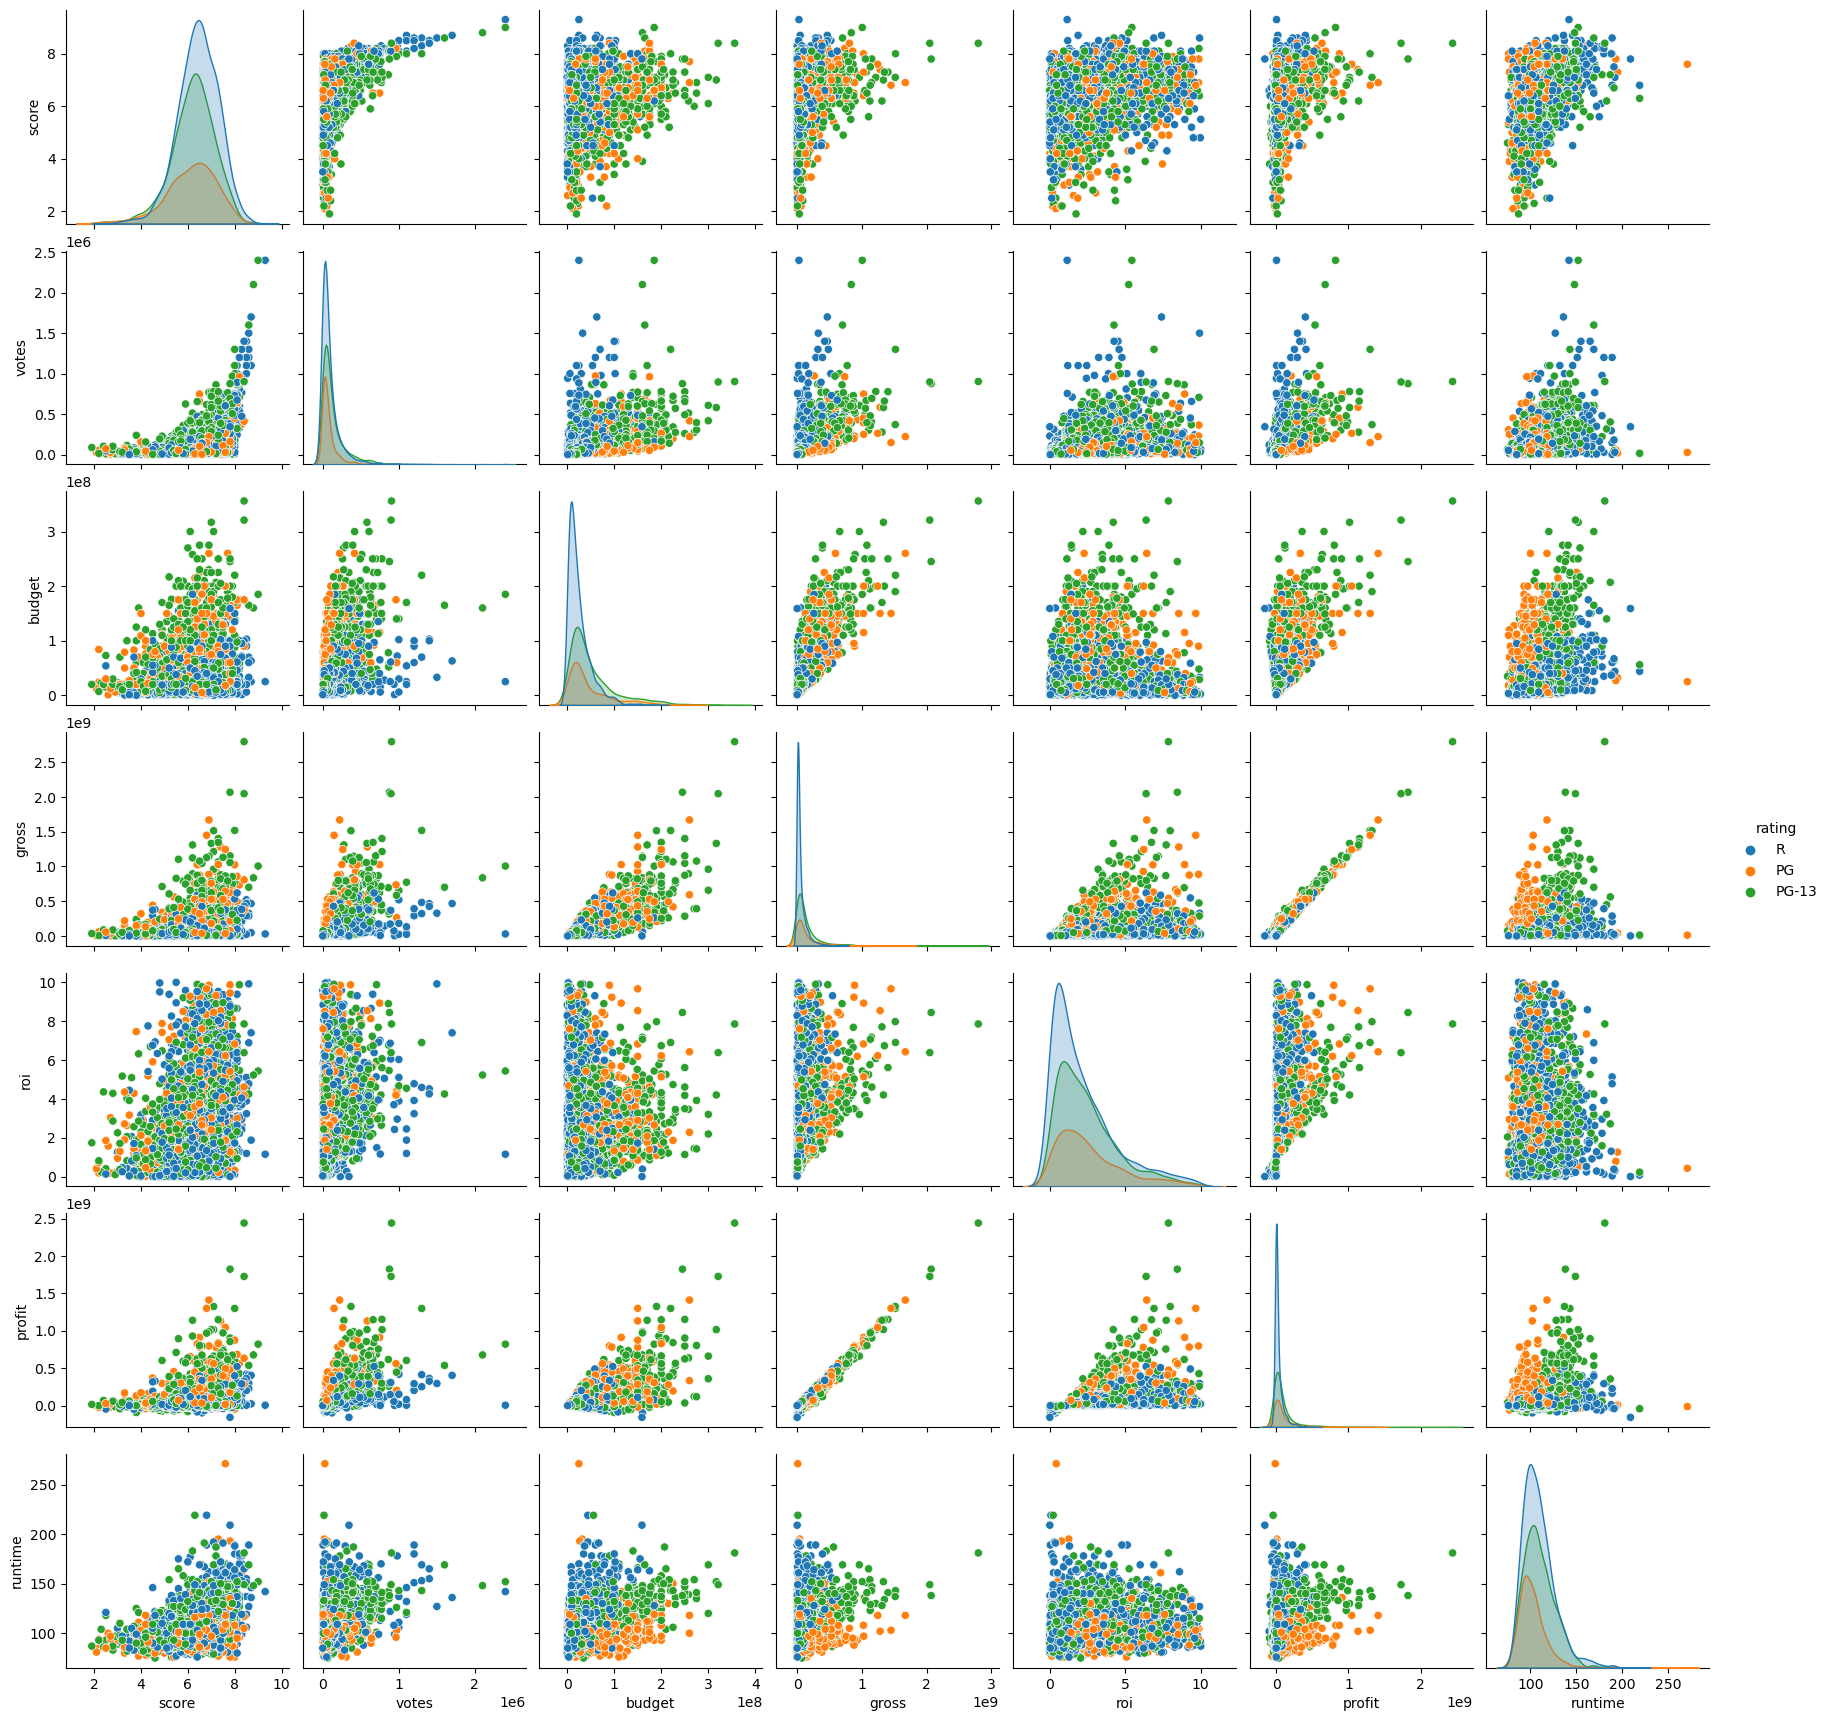

In [45]:
sns.pairplot(movies_cl.drop(columns = ['weekends', 'holiday', 'roi_cat', 'month', 'day', 'year']), hue='rating')

In [46]:
correlation_matrix = movies_num.corr(method="spearman")
gross_correlations = correlation_matrix["roi"].sort_values(ascending=False)
significant_correlations = gross_correlations[abs(gross_correlations) > 0.3]
print(significant_correlations)   

roi       1.000000
profit    0.868571
gross     0.720319
votes     0.564929
Name: roi, dtype: float64


In [47]:
from scipy.stats import spearmanr
columns = movies_num[['gross','votes','budget',"roi"]].columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        r_value, p_value = spearmanr(movies_num[column1], movies_num[column2])
        
        if p_value < 0.05:
            if 0.9<=abs(r_value)<=1:
                print(f"The r-value between {column1} and {column2} is {r_value:.6f}, and the p-value is {p_value:.2f}.There is collinearity problem between them.") 
            elif 0.7<=abs(r_value)<0.9:
                print(f"The r-value between {column1} and {column2} is {r_value:.6f}, and the p-value is {p_value:.2f}.The correlation strength between them is very strong.") 
            elif 0.5<=abs(r_value)<0.7:
                print(f"The r-value between {column1} and {column2} is {r_value:.6f}, and the p-value is {p_value:.2f}.The correlation strength between them is strong.")
            elif 0.3<=abs(r_value)<0.5:
                print(f"The r-value between {column1} and {column2} is {r_value:.6f}, and the p-value is {p_value:.2f}.The correlation strength between them is medium.") 
            elif abs(r_value)<0.3:
                print(f"The r-value between {column1} and {column2} is {r_value:.6f}, and the p-value is {p_value:.2f}.The correlation strength between them is weak.")    

The r-value between gross and votes is 0.765578, and the p-value is 0.00.The correlation strength between them is very strong.
The r-value between gross and budget is 0.753619, and the p-value is 0.00.The correlation strength between them is very strong.
The r-value between gross and roi is 0.720319, and the p-value is 0.00.The correlation strength between them is very strong.
The r-value between votes and budget is 0.573950, and the p-value is 0.00.The correlation strength between them is strong.
The r-value between votes and roi is 0.564929, and the p-value is 0.00.The correlation strength between them is strong.
The r-value between budget and roi is 0.138203, and the p-value is 0.00.The correlation strength between them is weak.


In [48]:
print("""If we set ROI as our target variable, besides gross revenuw, votes has strong relationship with ROI.""")

If we set ROI as our target variable, besides gross revenuw, votes has strong relationship with ROI.


### 3. ANOVA Analysis

In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


for num_variable in movies_num.columns:
    for cat_variable in movies_cat[[ 'genre', 'holiday','weekends','rating','roi_cat']].columns:
        formula = f"{num_variable} ~ {cat_variable}"
        model = ols(formula, data=movies).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        p_value = round(anova_table['PR(>F)'][cat_variable],4)
        if p_value < 0.05:
            print(f"ANOVA for {num_variable} with {cat_variable}:\n{anova_table}\n") 
            print(f"The p value for {num_variable} and {cat_variable} is {p_value}, we reject the null hypothesis, the difference between groups is statistical significant.")
        else:
            print("")

ANOVA for score with genre:
               sum_sq      df          F        PR(>F)
genre      374.915137    14.0  32.841152  1.636844e-84
Residual  3502.270851  4295.0        NaN           NaN

The p value for score and genre is 0.0, we reject the null hypothesis, the difference between groups is statistical significant.
ANOVA for score with holiday:
               sum_sq      df         F    PR(>F)
holiday      5.161718     1.0  5.742909  0.016598
Residual  3872.024270  4308.0       NaN       NaN

The p value for score and holiday is 0.0166, we reject the null hypothesis, the difference between groups is statistical significant.
ANOVA for score with weekends:
               sum_sq      df          F    PR(>F)
weekends    13.341054     1.0  14.874629  0.000117
Residual  3863.844935  4308.0        NaN       NaN

The p value for score and weekends is 0.0001, we reject the null hypothesis, the difference between groups is statistical significant.
ANOVA for score with rating:
             

ANOVA for runtime with roi_cat:
                sum_sq      df         F    PR(>F)
roi_cat   8.227406e+03     4.0  6.717327  0.000022
Residual  1.318195e+06  4305.0       NaN       NaN

The p value for runtime and roi_cat is 0.0, we reject the null hypothesis, the difference between groups is statistical significant.

ANOVA for day with holiday:
                 sum_sq      df          F        PR(>F)
holiday     2103.665712     1.0  29.512322  5.862657e-08
Residual  307078.235912  4308.0        NaN           NaN

The p value for day and holiday is 0.0, we reject the null hypothesis, the difference between groups is statistical significant.
ANOVA for day with weekends:
                 sum_sq      df          F   PR(>F)
weekends    1248.327749     1.0  17.464143  0.00003
Residual  307933.573875  4308.0        NaN      NaN

The p value for day and weekends is 0.0, we reject the null hypothesis, the difference between groups is statistical significant.


ANOVA for year with genre:
      

### 4. Visualiztion: ROI by Genre & Score, Budget & Revenue by Genre

#### Boxplot of ROI by genre, rating, holiday, weekend and score 

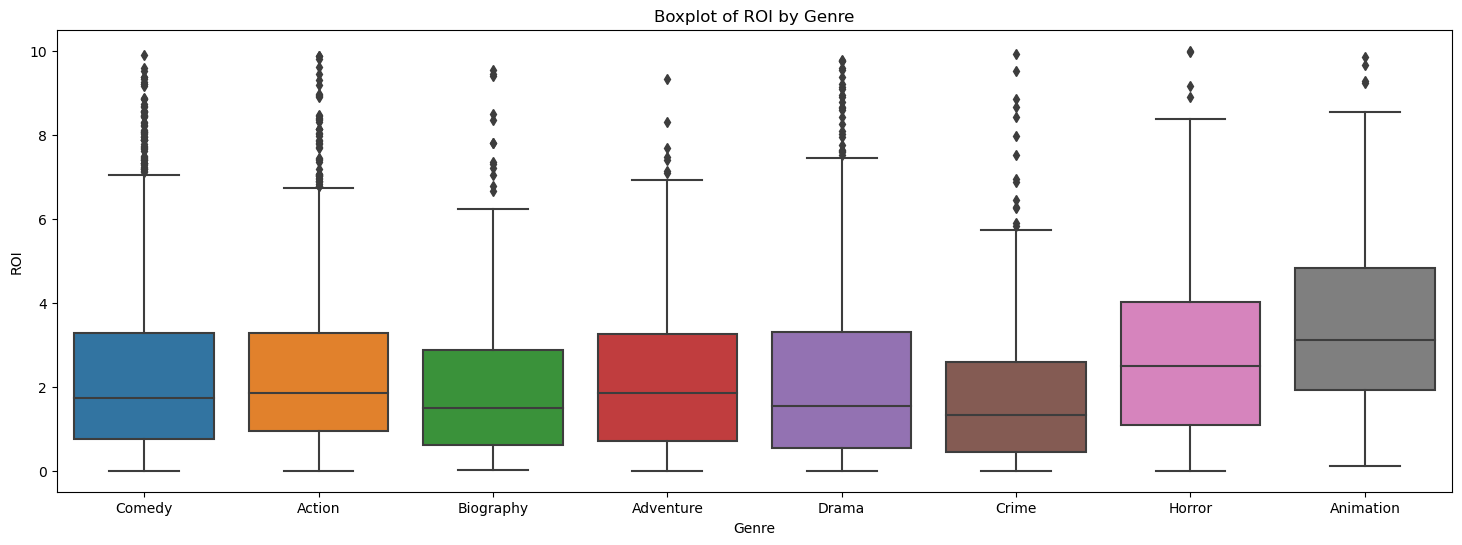

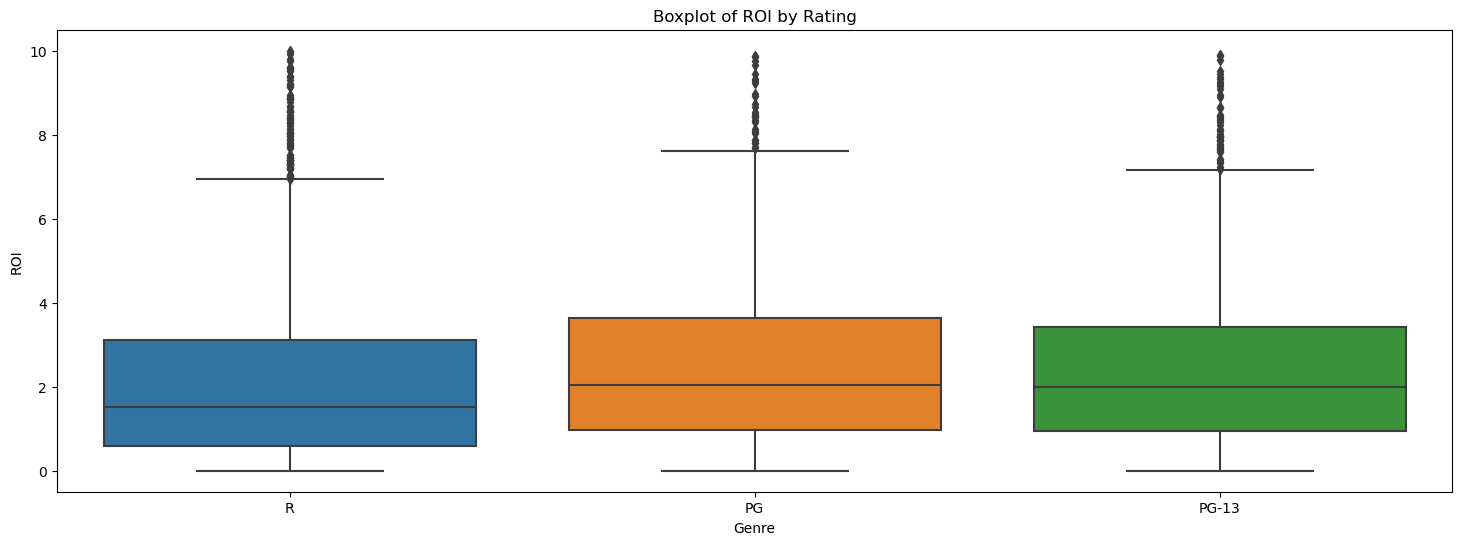

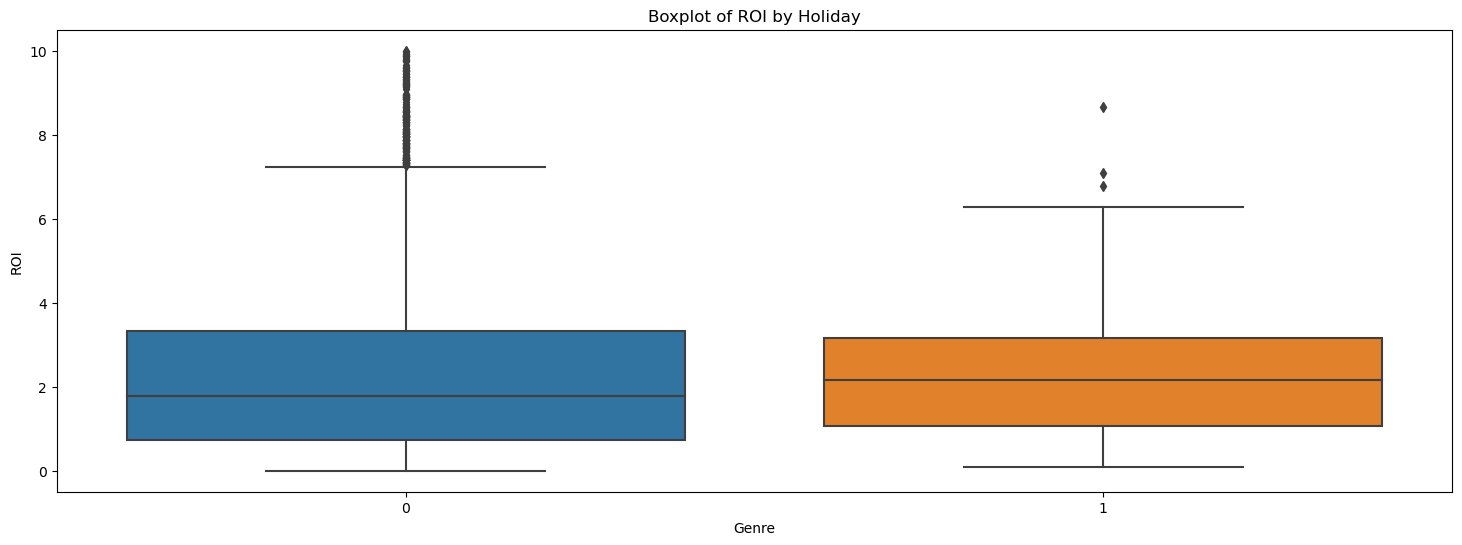

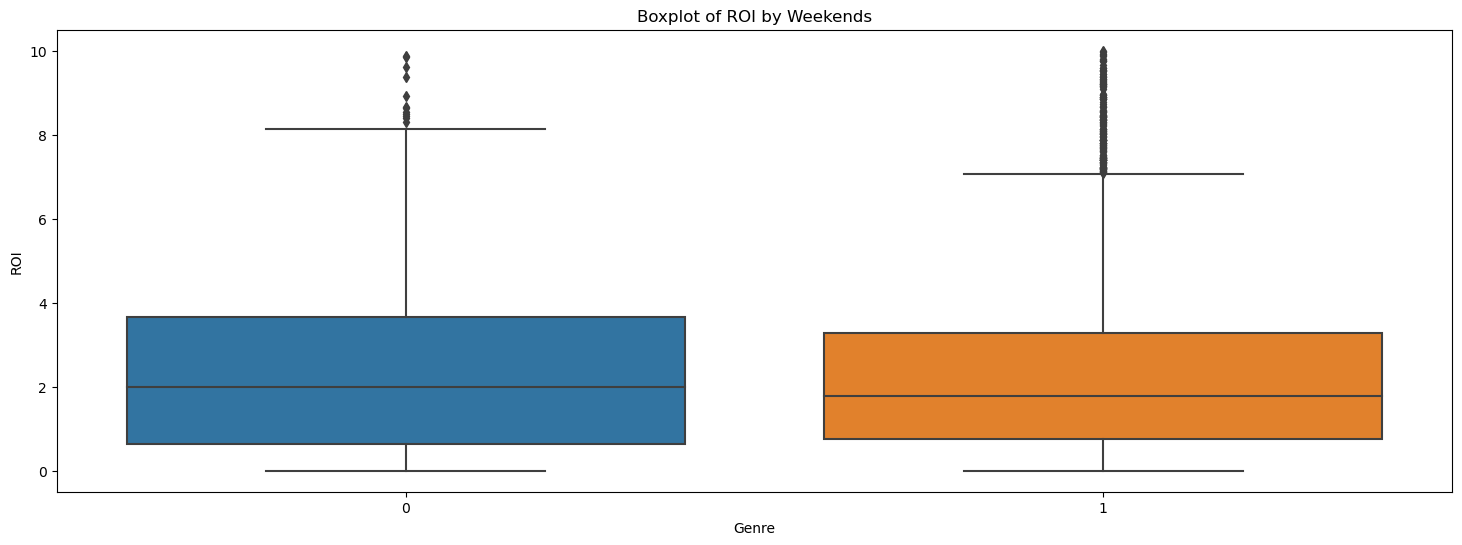

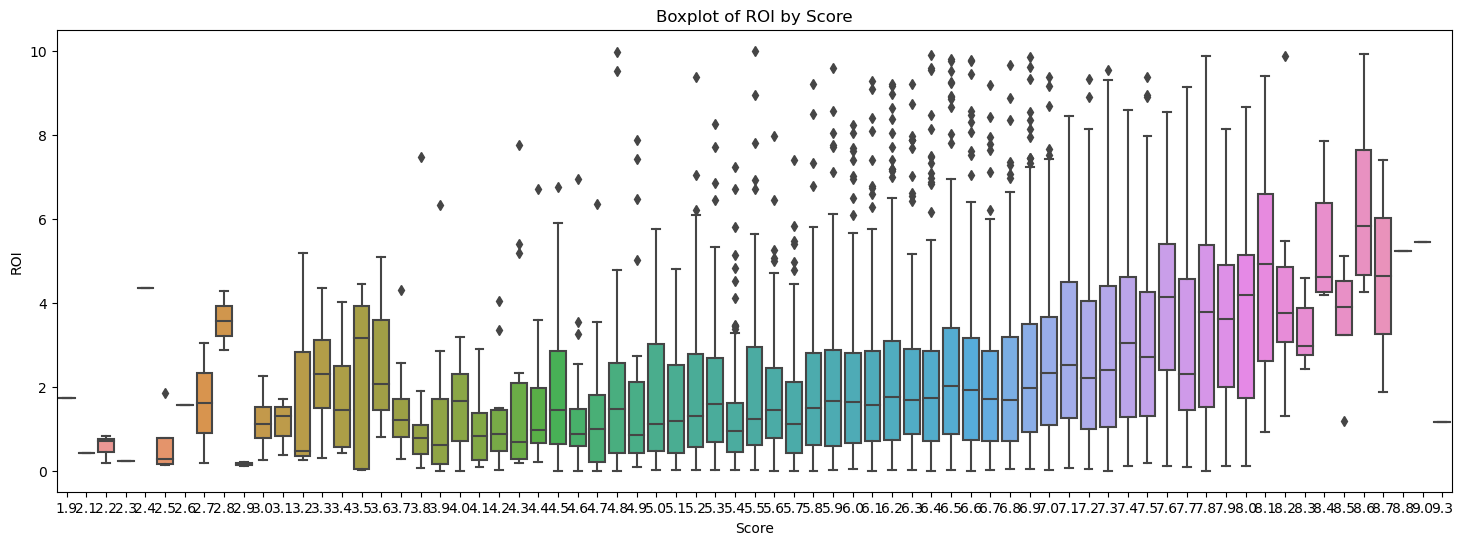

In [50]:
# ROI & Genre 
plt.figure(figsize=(18, 6))
sns.boxplot(x='genre', y='roi', data=movies_cl)
plt.title('Boxplot of ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.show()
# ROI & Rating
plt.figure(figsize=(18, 6))
sns.boxplot(x='rating', y='roi', data=movies_cl)
plt.title('Boxplot of ROI by Rating')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.show()
# ROI & holiday
plt.figure(figsize=(18, 6))
sns.boxplot(x='holiday', y='roi', data=movies_cl)
plt.title('Boxplot of ROI by Holiday')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.show()
# ROI & Rating
plt.figure(figsize=(18, 6))
sns.boxplot(x='weekends', y='roi', data=movies_cl)
plt.title('Boxplot of ROI by Weekends')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.show()
# ROI & Score 
plt.figure(figsize=(18, 6))
sns.boxplot(x='score', y='roi', data=movies_cl)
plt.title('Boxplot of ROI by Score')
plt.xlabel('Score')
plt.ylabel('ROI')
plt.show()

#### Scatterplot of ROI, budget, revenue by genre & rating

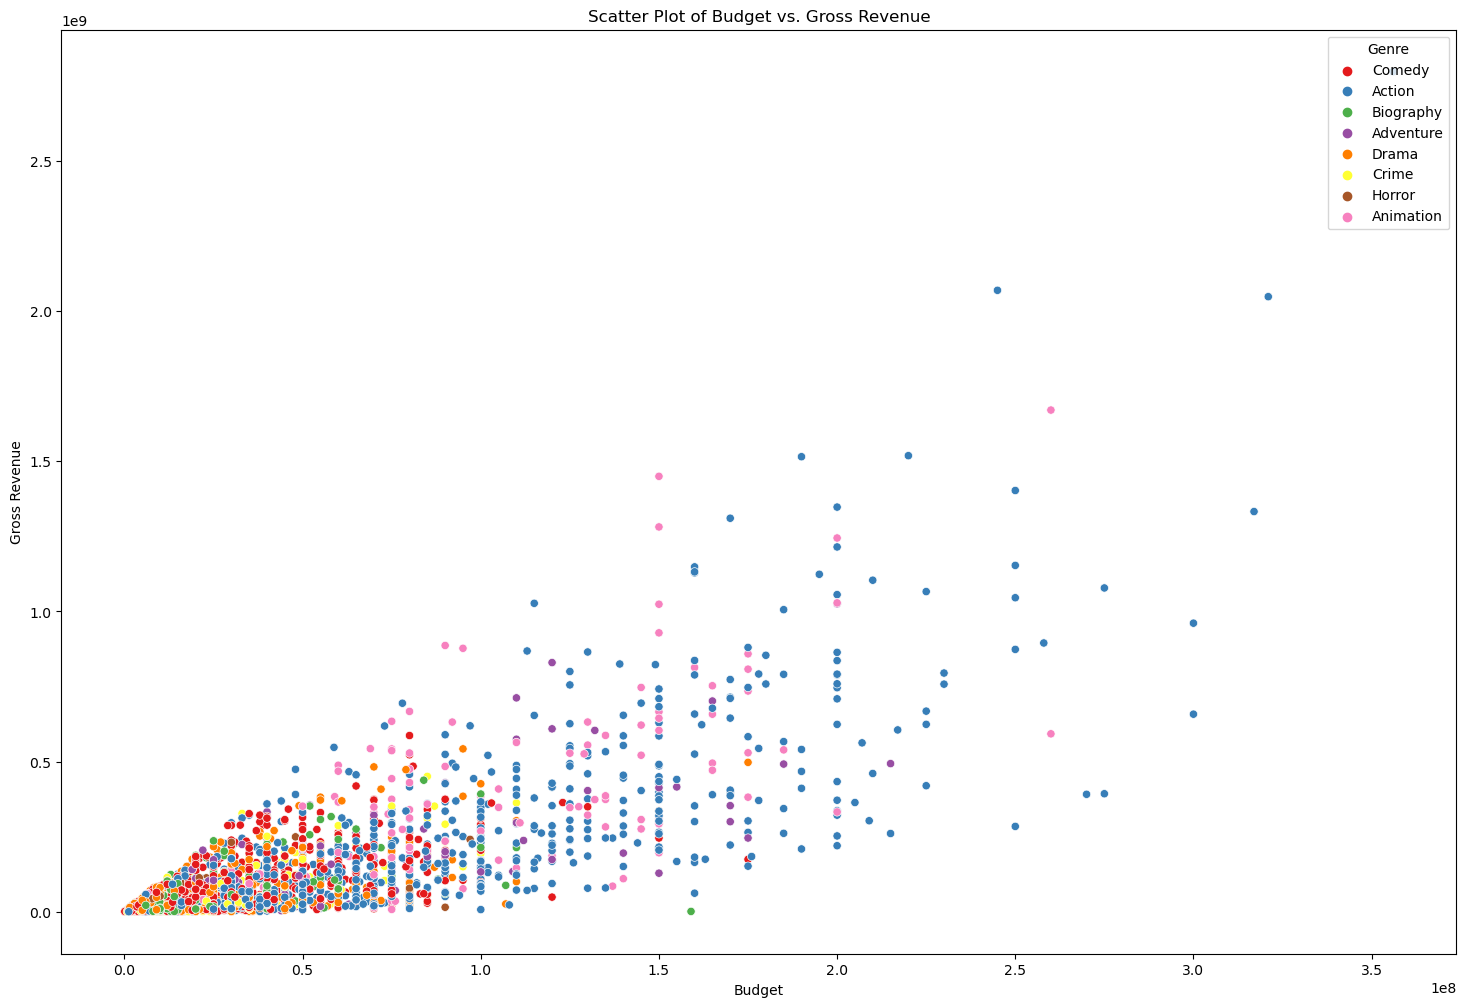

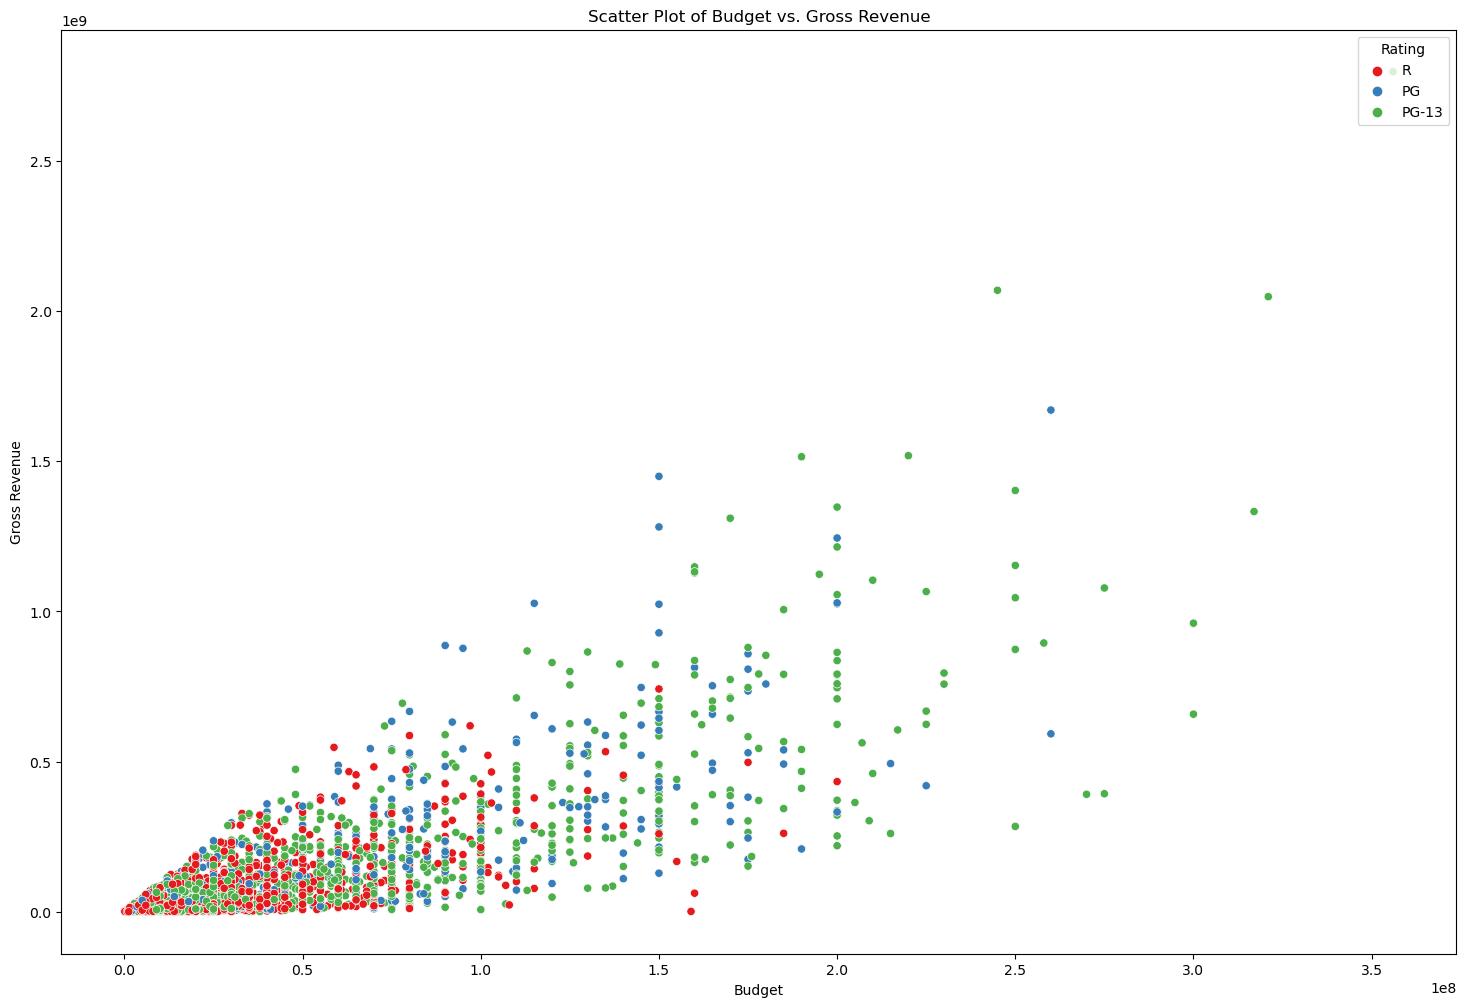

In [51]:
# Budget & Revenue by Genre
plt.figure(figsize=(18, 12))
sns.scatterplot(x='budget', y='gross', hue='genre', data=movies_cl, palette='Set1')
plt.title('Scatter Plot of Budget vs. Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.legend(title='Genre', loc='upper right')
plt.show()


# Budget & Revenue by Rating
plt.figure(figsize=(18, 12))
sns.scatterplot(x='budget', y='gross', hue='rating', data=movies_cl, palette='Set1')
plt.title('Scatter Plot of Budget vs. Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.legend(title='Rating', loc='upper right')
plt.show()

#### Lineplot of Numbers of Movies released by year

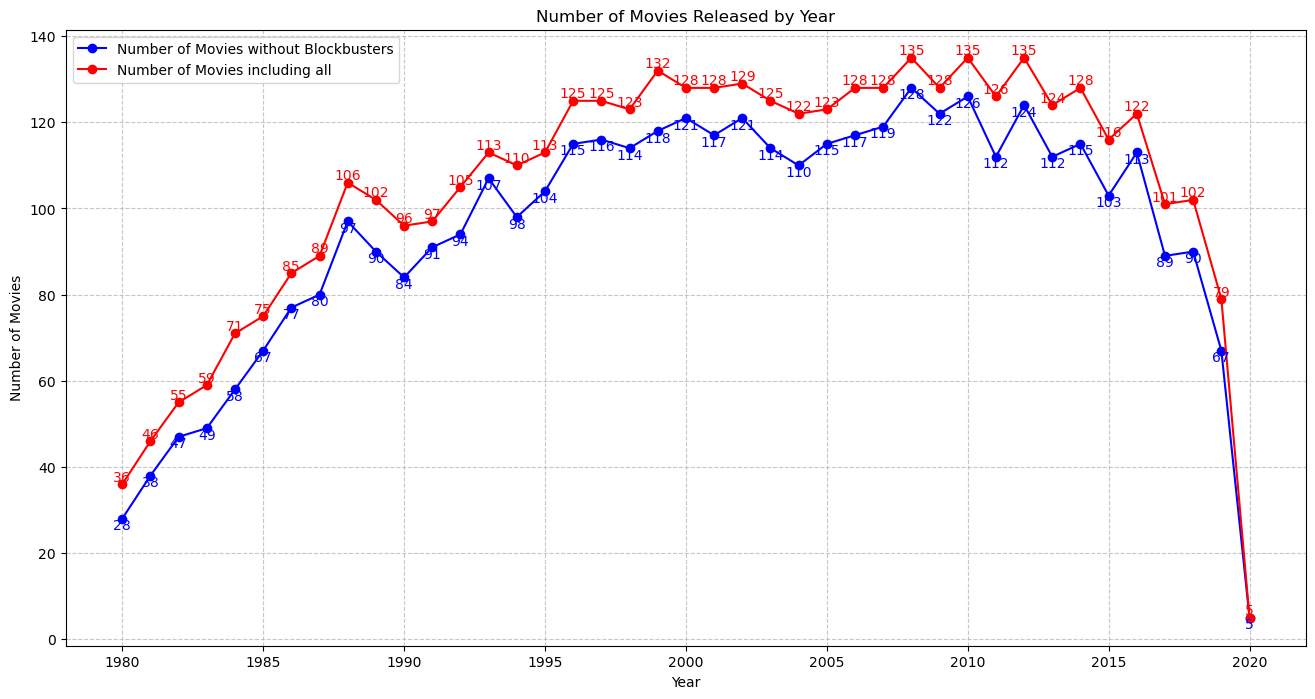

In [52]:
# Count rows by year
yearly_counts_cl = movies_cl.groupby('year').size().reset_index(name='Number of Movies')
yearly_counts_org = movies.groupby('year').size().reset_index(name='Number of Movies')
# Create a bar plot
plt.figure(figsize=(16, 8))
plt.plot(yearly_counts_cl['year'], yearly_counts_cl['Number of Movies'], marker='o', linestyle='-', color='b', label='Number of Movies without Blockbusters')
plt.plot(yearly_counts_org['year'], yearly_counts_org['Number of Movies'], marker='o', linestyle='-', color='r', label='Number of Movies including all')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Add value labels to the bars
for index, row in yearly_counts_cl.iterrows():
    plt.text(row['year'], row['Number of Movies'], str(row['Number of Movies']), ha='center', va='top', color='b')
for index, row in yearly_counts_org.iterrows():
    plt.text(row['year'], row['Number of Movies'], str(row['Number of Movies']), ha='center', va='bottom', color='r')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.show()

#### Lineplot of ROI over the years

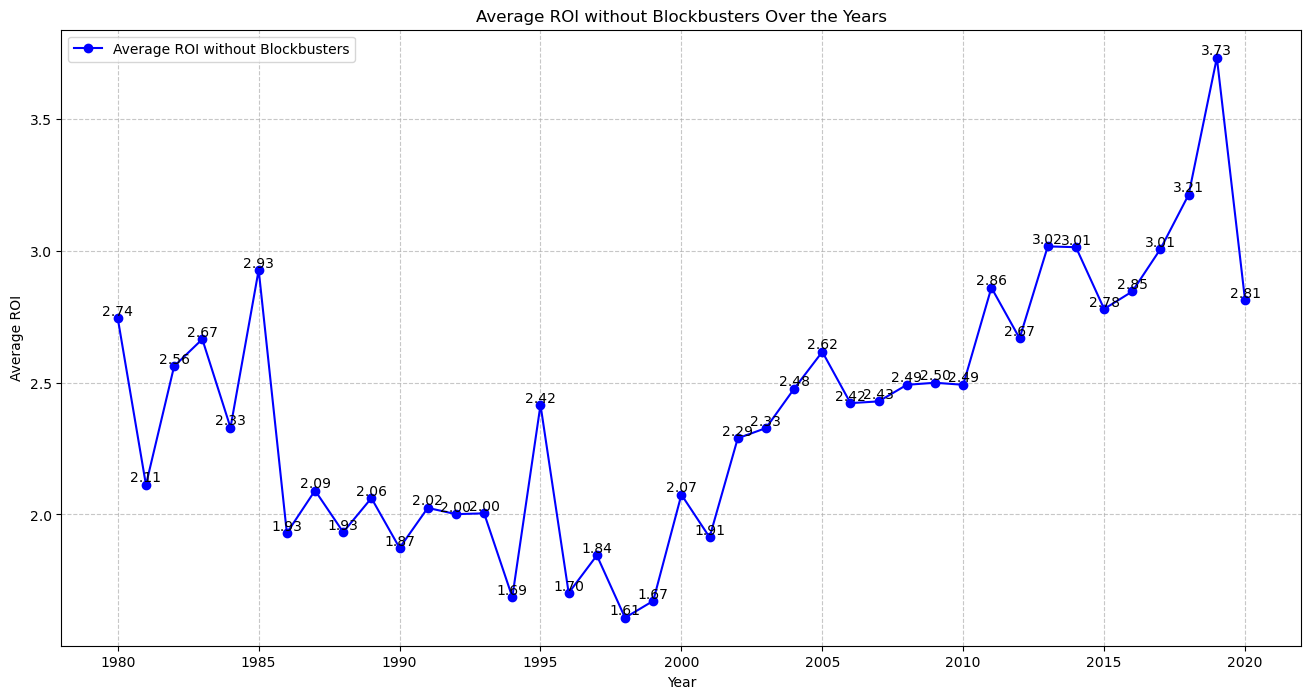

In [53]:
# Calculate average ROI by year
average_roi_by_year_cl = movies_cl.groupby('year')['roi'].mean().reset_index()
# average_roi_by_year_org = movies.groupby('year')['ROI'].mean().reset_index()
# Create a line plot
plt.figure(figsize=(16, 8))
plt.plot(average_roi_by_year_cl['year'], average_roi_by_year_cl['roi'], marker='o', linestyle='-', color='b', label='Average ROI without Blockbusters')
# plt.plot(average_roi_by_year['year'], average_roi_by_year_org['ROI'], marker='o', linestyle='-', color='r', label='Average ROI including all')
plt.title('Average ROI without Blockbusters Over the Years')
plt.xlabel('Year')
plt.ylabel('Average ROI')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left') 
# Add ROI values to the plot
for index, row in average_roi_by_year_cl.iterrows():
    plt.text(row['year'], row['roi'], f'{row["roi"]:.2f}', ha='center', va='bottom')

plt.show()

#### Lineplot of Budget and Profit over the years

<Figure size 1600x800 with 0 Axes>

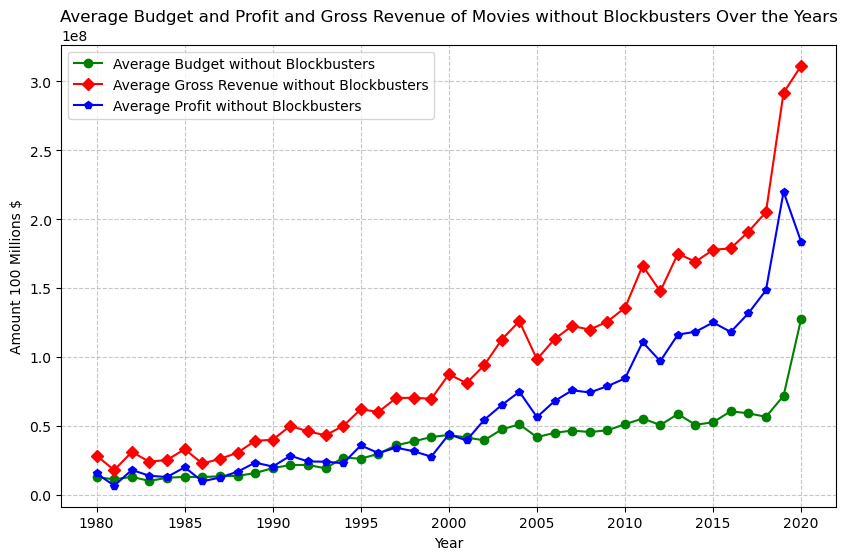

In [54]:
plt.figure(figsize=(16, 8))


budget_by_year = movies_cl.groupby('year')['budget'].mean()
profit_by_year = movies_cl.groupby('year')['profit'].mean()
gross_by_year = movies_cl.groupby('year')['gross'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(budget_by_year.index, budget_by_year.values, marker='o', linestyle='-', color='g', label='Average Budget without Blockbusters')
plt.plot(gross_by_year.index, gross_by_year.values, marker='D', linestyle='-', color='r', label='Average Gross Revenue without Blockbusters')
plt.plot(profit_by_year.index, profit_by_year.values, marker='p', linestyle='-', color='b', label='Average Profit without Blockbusters')


plt.title('Average Budget and Profit and Gross Revenue of Movies without Blockbusters Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount 100 Millions $')
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## III. Machine Learning

### Regression

#### Data Preprocessing

In [3]:
df = pd.read_csv('data/movies_new.csv')
df['weekends'] = df['weekends'].replace({'True': 1, "False": 0}).astype('int')

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['roi', 'profit', 'budget', 'gross'])  
y = df['roi']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify = X['roi_cat'], random_state=42
    )

In [5]:
def preprocessing(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[['score', 'votes', 'runtime']] = scaler.fit_transform(df[['score', 'votes', 'runtime']])
    # df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df_cat = df.select_dtypes(exclude = ['float', 'int']).drop(columns = ['name', 'director', 'company', 'star', 'writer'])
    df.drop(columns = df_cat.columns, inplace = True)
    df_cat = pd.get_dummies(df_cat, columns=df_cat.columns)
    df = pd.concat([df, df_cat], axis = 1)
    return df

In [6]:
X_train = preprocessing(X_train).drop(columns = ['name', 'director', 'star', 'writer', 'company', 'roi_cat'])
X_test = preprocessing(X_test).drop(columns = ['name', 'director', 'star', 'writer', 'company', 'roi_cat'])

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 854 to 410
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   score            2938 non-null   float64
 1   votes            2938 non-null   float64
 2   runtime          2938 non-null   float64
 3   month            2938 non-null   int64  
 4   day              2938 non-null   int64  
 5   year             2938 non-null   int64  
 6   holiday          2938 non-null   int64  
 7   weekends         2938 non-null   int32  
 8   rating_PG        2938 non-null   uint8  
 9   rating_PG-13     2938 non-null   uint8  
 10  rating_R         2938 non-null   uint8  
 11  genre_Action     2938 non-null   uint8  
 12  genre_Adventure  2938 non-null   uint8  
 13  genre_Animation  2938 non-null   uint8  
 14  genre_Biography  2938 non-null   uint8  
 15  genre_Comedy     2938 non-null   uint8  
 16  genre_Crime      2938 non-null   uint8  
 17  genre_Drama  

#### Training the models

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Model = []
RMSE = []
R_sq = []


def input_scores(name, model, X, y):
    y_pred = model.predict(X)
    Model.append(name)
    RMSE.append(np.sqrt(mean_squared_error(y, y_pred)))
    R_sq.append(r2_score(y, y_pred))

In [9]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
)

try:
    import xgboost as xgb
    import lightgbm as lgb
except:
    !pip install xgboost
    !pip install lightgbm

    import xgboost as xgb
    import lightgbm as lgb


names = [
    "Ridge Regression",
    "Lasso Regression",
    "K Neighbors Regressor",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Adaboost Regressor",
    "XGBoost Regressor",
    "LightGBM Regressor",
]
models = [
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor(),
]

In [62]:
for name, model in zip(names, models):
    model.fit(X_train, y_train)
    input_scores(name, model, X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 19
[LightGBM] [Info] Start training from score 2.355574


In [63]:
# Train Scores

evaluation = pd.DataFrame(
    {
        "Model": Model,
        "RMSE": RMSE,
        "R Squared": R_sq,
    }
)
evaluation

Model      RMSE  R Squared
0         Ridge Regression  1.880693   0.189295
1         Lasso Regression  2.071763   0.016200
2    K Neighbors Regressor  1.791795   0.264125
3  Decision Tree Regressor  0.000000   1.000000
4  Random Forest Regressor  0.662797   0.899310
5       Adaboost Regressor  1.887479   0.183434
6        XGBoost Regressor  0.460567   0.951380
7       LightGBM Regressor  1.139292   0.702493

#### Testing the models

In [64]:
Model = []
RMSE = []
R_sq = []
    

for name, model in zip(names, models):
    model.fit(X_train, y_train)
    input_scores(name, model, X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 19
[LightGBM] [Info] Start training from score 2.355574


In [65]:
#Test Scores

evaluation = pd.DataFrame(
    {
        "Model": Model,
        "RMSE": RMSE,
        "R Squared": R_sq,
    }
)
evaluation

Model      RMSE  R Squared
0         Ridge Regression  1.859455   0.228865
1         Lasso Regression  2.093256   0.022754
2    K Neighbors Regressor  2.227327  -0.106438
3  Decision Tree Regressor  2.406962  -0.292104
4  Random Forest Regressor  1.744749   0.321070
5       Adaboost Regressor  1.962825   0.140745
6        XGBoost Regressor  1.871641   0.218724
7       LightGBM Regressor  1.780636   0.292854

#### Searching best hyperparameters

In [66]:
# Running this code will take some time, please be patient :)

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15]
}
rf = RandomForestRegressor(random_state=42)
lgbm_regressor = lgb.LGBMRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("RandomForest Best Hyperparameters:", best_params)

lgbm_grid_search = GridSearchCV(lgbm_regressor, lgbm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)
print("LightGBM Best Hyperparameters:", lgbm_grid_search.best_params_)

lgbm_best_model = lgbm_grid_search.best_estimator_


y_pred = best_rf.predict(X_test)
y_pred_lgbm = lgbm_best_model.predict(X_test)

RandomForest Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 19
[LightGBM] [Info] Start training from score 2.355574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [67]:
print(f"RMSE Best RF:{np.sqrt(mean_squared_error(y_test, y_pred)): .3f}")
print(f"R-Squared Best RF:{r2_score(y_test, y_pred): .3f}")

RMSE Best RF: 1.716
R-Squared Best RF: 0.343


In [68]:
print(f"RMSE Best LightGBM:{np.sqrt(mean_squared_error(y_test, y_pred_lgbm)): .3f}")
print(f"R-Squared Best LightGBM:{r2_score( y_test, y_pred_lgbm): .3f}")

RMSE Best LightGBM: 1.752
R-Squared Best LightGBM: 0.316


#### Explainability for Regression

In [71]:
# for RandomForest
residuals = y_test - y_pred

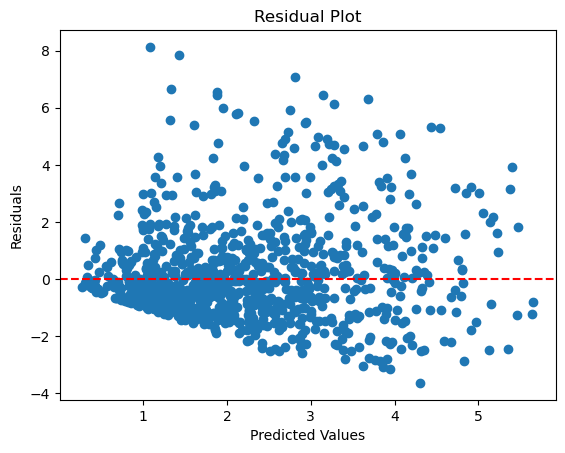

In [72]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [73]:
# for LightGBM
residuals = y_test - y_pred_lgbm

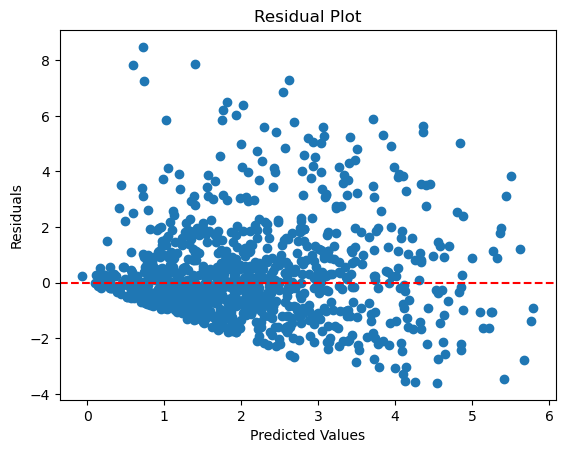

In [74]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_lgbm, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [10]:
# Feature Importance 

def feature_imp(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor(max_depth = 10, min_samples_leaf =  4, min_samples_split = 10, n_estimators =  300)
    lgbm_model = lgb.LGBMRegressor(learning_rate = 0.05, max_dept = 10, n_estimators = 100)

    results = pd.DataFrame(columns=['Feature', 'RF_RMSE', 'RF_R2', 'LGBM_RMSE', 'LGBM_R2'])

    rf_rmse_scores = []
    rf_r2_scores = []
    lgbm_rmse_scores = []
    lgbm_r2_scores = []

    for col in X_train.columns:
        X_train_temp = X_train.drop(columns=[col])
        X_test_temp = X_test.drop(columns=[col])
        rf_model.fit(X_train_temp, y_train)
        rf_predictions = rf_model.predict(X_test_temp)
        rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
        rf_r2 = r2_score(y_test, rf_predictions)
        rf_rmse_scores.append(rf_rmse)
        rf_r2_scores.append(rf_r2)

        lgbm_model.fit(X_train_temp, y_train)

        lgbm_predictions = lgbm_model.predict(X_test_temp)
        lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_predictions))
        lgbm_r2 = r2_score(y_test, lgbm_predictions)
        lgbm_rmse_scores.append(lgbm_rmse)
        lgbm_r2_scores.append(lgbm_r2)

        results = results.append({
            'Feature': col,
            'RF_RMSE': rf_rmse,
            'RF_R2': rf_r2,
            'LGBM_RMSE': lgbm_rmse,
            'LGBM_R2': lgbm_r2
        }, ignore_index=True)

    return results
    

In [15]:
# Running this code will take some time, please be patient :)
feature_imp(X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 18
[LightGBM] [Info] Start training from score 2.355574
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 18


Feature   RF_RMSE     RF_R2  LGBM_RMSE   LGBM_R2
0             score  1.725552  0.335928   1.755540  0.312646
1             votes  1.945759  0.155621   1.976991  0.128297
2           runtime  1.716466  0.342903   1.723921  0.337183
3             month  1.719763  0.340377   1.750090  0.316907
4               day  1.721288  0.339206   1.755776  0.312461
5              year  1.780828  0.292701   1.810490  0.268943
6           holiday  1.713978  0.344807   1.743820  0.321793
7          weekends  1.714740  0.344224   1.746321  0.319846
8         rating_PG  1.713300  0.345325   1.749851  0.317093
9      rating_PG-13  1.717321  0.342248   1.755775  0.312462
10         rating_R  1.722087  0.338592   1.754024  0.313833
11     genre_Action  1.727594  0.334355   1.741457  0.323630
12  genre_Adventure  1.720209  0.340034   1.758581  0.310262
13  genre_Animation  1.713836  0.344915   1.750271  0.316766
14  genre_Biography  1.713065  0.345505   1.747300  0.319083
15     genre_Comedy  1.727166  0.334685   1.756491  0.311901
16      genre_Crime  1.719381  0.340669   1.745675  0.320350
17      genre_Drama  1.715192  0.343879   1.744690  0.321116
18     genre_Horror  1.721610  0.338959   1.759509  0.309535

In [75]:
df.columns

Index(['name', 'rating', 'genre', 'score', 'votes', 'budget', 'gross', 'roi',
       'roi_cat', 'profit', 'runtime', 'month', 'day', 'year', 'holiday',
       'weekends', 'company', 'director', 'writer', 'star'],
      dtype='object')

In [76]:
X = pd.get_dummies(df[['rating', 'genre', 'score', 'votes', 'budget', 'gross', 'runtime', 'month', 'day', 'year']]).values
y = df['roi'].values

#### Feature exploration : directors, stars, writers and companies with target "roi"

We want to understand the influence director, stars, companies and writers have on predicting the ROI of a movie.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


def regression_with_multiple_models(X, y):
   
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define regression models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree Regression": DecisionTreeRegressor(),
        "Random Forest Regression": RandomForestRegressor(),
        "Support Vector Regression": SVR(kernel="linear"),
        "Gradient Boosting Regression": GradientBoostingRegressor(),
    }

    results = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)

        results[model_name] = {
            "MSE": mse,
            "MAE": mae,
            "R-squared": r2,
            "the training score": train_score,
            "the testing score": test_score,
        }

    return results

model_results = regression_with_multiple_models(X, y)
for model_name, metrics in model_results.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}, training score: {metrics['the training score']:.2f}, testing score: {metrics['the testing score']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 2.47, MAE: 1.15, R-squared: 0.43, training score: 0.43, testing score: 0.43
----------------------------------------------------
Decision Tree Regression - MSE: 0.22, MAE: 0.22, R-squared: 0.95, training score: 1.00, testing score: 0.95
----------------------------------------------------
Random Forest Regression - MSE: 0.08, MAE: 0.11, R-squared: 0.98, training score: 1.00, testing score: 0.98
----------------------------------------------------
Support Vector Regression - MSE: 2.65, MAE: 1.07, R-squared: 0.39, training score: 0.34, testing score: 0.39
----------------------------------------------------
Gradient Boosting Regression - MSE: 0.13, MAE: 0.19, R-squared: 0.97, training score: 0.99, testing score: 0.97
----------------------------------------------------


#### 1. Top directors

#### Top 10 directors VS roi

In [78]:
top_directors = df['director'].value_counts().head(10).index.tolist()
top_directors_df = df[df['director'].isin(top_directors)]
top_directors

['Clint Eastwood',
 'Woody Allen',
 'Steven Spielberg',
 'Ron Howard',
 'Ridley Scott',
 'Barry Levinson',
 'Joel Schumacher',
 'Steven Soderbergh',
 'Martin Scorsese',
 'Tim Burton']

In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

In [80]:
from sklearn.preprocessing import StandardScaler

X_directors = top_directors_df[['director']]
y_directors = top_directors_df['roi']

X_directors_encoded = encoder.fit_transform(X_directors)

model_results_directors = regression_with_multiple_models(X_directors_encoded, y_directors)

for model_name, metrics in model_results_directors.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}, training score: {metrics['the training score']:.2f}, testing score: {metrics['the testing score']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 4.76, MAE: 1.69, R-squared: -0.04, training score: 0.19, testing score: -0.04
----------------------------------------------------
Decision Tree Regression - MSE: 4.58, MAE: 1.65, R-squared: -0.00, training score: 0.20, testing score: -0.00
----------------------------------------------------
Random Forest Regression - MSE: 4.61, MAE: 1.66, R-squared: -0.01, training score: 0.20, testing score: -0.01
----------------------------------------------------
Support Vector Regression - MSE: 4.62, MAE: 1.53, R-squared: -0.01, training score: 0.15, testing score: -0.01
----------------------------------------------------
Gradient Boosting Regression - MSE: 4.57, MAE: 1.65, R-squared: 0.00, training score: 0.20, testing score: 0.00
----------------------------------------------------


The MSE ranged from 4.57 to 4.76, which is higher compared to the models for the top stars.

The MAE ranged from 1.53 to 1.69, which is similar to the models for the top stars.

The R2 values were around 0.00 or even negative, indicating that the top 10 directors do not explain the variability in ROI at all.

The training and testing scores were similar, indicating that there isn't significant overfitting or underfitting in the models.

#### Top 10 directors feature important

In [81]:
best_model = GradientBoostingRegressor()

scaler = StandardScaler()
X_directors_scaled = scaler.fit_transform(X_directors_encoded)
best_model.fit(X_directors_scaled, y_directors)

feature_importances = best_model.feature_importances_

feature_importance_dict = dict(zip(top_directors, feature_importances))

feature_importance_dict

{'Clint Eastwood': 0.02673045026817543,
 'Woody Allen': 0.04830294176061218,
 'Steven Spielberg': 0.003387234937432849,
 'Ron Howard': 0.05124993235664182,
 'Ridley Scott': 0.03299026154737248,
 'Barry Levinson': 0.12940116228311907,
 'Joel Schumacher': 0.0005852122115706786,
 'Steven Soderbergh': 0.28729582353046373,
 'Martin Scorsese': 0.0340511954128624,
 'Tim Burton': 0.3860057856917493}

In this context, the feature importance values indicate the relative contribution of each director to the prediction of the model. For example, Tim Burton, with the highest feature importance of 0.386, has the most significant impact on the model's predictions for ROI, followed by Steven Soderbergh with 0.287.

#### Top 20 directors VS roi

In [82]:
top_directors20 = df['director'].value_counts().head(20).index.tolist()
top_directors20_df = df[df['director'].isin(top_directors20)]
top_directors20

['Clint Eastwood',
 'Woody Allen',
 'Steven Spielberg',
 'Ron Howard',
 'Ridley Scott',
 'Barry Levinson',
 'Joel Schumacher',
 'Steven Soderbergh',
 'Martin Scorsese',
 'Tim Burton',
 'Spike Lee',
 'Walter Hill',
 'Brian De Palma',
 'Rob Reiner',
 'Oliver Stone',
 'Tony Scott',
 'Richard Donner',
 'Renny Harlin',
 'Michael Bay',
 'Robert Rodriguez']

In [83]:
X_directors20 = top_directors20_df[['director']]
y_directors = top_directors20_df['roi']

X_directors_encoded = encoder.fit_transform(X_directors20)

model_results_directors = regression_with_multiple_models(X_directors_encoded, y_directors)

for model_name, metrics in model_results_directors.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 4.17, MAE: 1.52, R-squared: -0.06
----------------------------------------------------
Decision Tree Regression - MSE: 4.13, MAE: 1.51, R-squared: -0.05
----------------------------------------------------
Random Forest Regression - MSE: 4.10, MAE: 1.50, R-squared: -0.04
----------------------------------------------------
Support Vector Regression - MSE: 4.08, MAE: 1.41, R-squared: -0.03
----------------------------------------------------
Gradient Boosting Regression - MSE: 4.10, MAE: 1.52, R-squared: -0.04
----------------------------------------------------


#### Top 10 directors VS gross

In [84]:
top_directors = df['director'].value_counts().head(10).index.tolist()
top_directors_df = df[df['director'].isin(top_directors)]

X_directors = top_directors_df[['director']]
y_directors = top_directors_df['gross']

X_directors_encoded = encoder.fit_transform(X_directors)

model_results_directors = regression_with_multiple_models(X_directors_encoded, y_directors)

for model_name, metrics in model_results_directors.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}")
    print("----------------------------------------------------")

Linear Regression - MSE: 19652089266743532.00, MAE: 97554351.44, R-squared: 0.16
----------------------------------------------------
Decision Tree Regression - MSE: 19054167221966448.00, MAE: 97062809.67, R-squared: 0.19
----------------------------------------------------
Random Forest Regression - MSE: 18863209153522736.00, MAE: 96267870.52, R-squared: 0.20
----------------------------------------------------
Support Vector Regression - MSE: 25300264317019800.00, MAE: 89755307.13, R-squared: -0.08
----------------------------------------------------
Gradient Boosting Regression - MSE: 19035908371132972.00, MAE: 97102985.05, R-squared: 0.19
----------------------------------------------------


#### 2. Stars

#### Top 10 stars VS roi

In [85]:
top_stars = df['star'].value_counts().head(10).index.tolist()

top_stars_data = df[df['star'].isin(top_stars)]

top_stars


['Nicolas Cage',
 'Robert De Niro',
 'Bruce Willis',
 'Denzel Washington',
 'Tom Hanks',
 'Adam Sandler',
 'Sylvester Stallone',
 'Tom Cruise',
 'Johnny Depp',
 'Kevin Costner']

In [86]:
X_stars = top_stars_data[['star']]
y_stars = top_stars_data['roi']

X_stars_encoded = encoder.fit_transform(X_stars)

model_results_stars = regression_with_multiple_models(X_stars_encoded, y_stars)

for model_name, metrics in model_results_stars.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")


Linear Regression - MSE: 3.08, MAE: 1.28, R-squared: 0.11
----------------------------------------------------
Decision Tree Regression - MSE: 3.08, MAE: 1.28, R-squared: 0.11
----------------------------------------------------
Random Forest Regression - MSE: 3.07, MAE: 1.28, R-squared: 0.11
----------------------------------------------------
Support Vector Regression - MSE: 3.10, MAE: 1.23, R-squared: 0.10
----------------------------------------------------
Gradient Boosting Regression - MSE: 3.07, MAE: 1.28, R-squared: 0.11
----------------------------------------------------


The Mean Squared Error (MSE) ranged from 3.06 to 3.10, which indicates the average squared difference between the estimated values and the actual value.

The R2 values were around 0.11, indicating that only about 11% of the variability in ROI can be explained by the top 10 stars. This is a low score, suggesting that stars are not strong predictors of ROI.

The training and testing scores were similar, indicating that there isn't significant overfitting or underfitting in the models.

#### Top 10 stars feature importance

In [87]:
best_model_stars_rf = RandomForestRegressor()
best_model_stars_rf.fit(X_stars_encoded, y_stars)

feature_importances_stars_rf = best_model_stars_rf.feature_importances_
feature_importance_dict_stars_rf = dict(zip(top_stars, feature_importances_stars_rf))
feature_importance_dict_stars_rf

{'Nicolas Cage': 0.10309619437204773,
 'Robert De Niro': 0.0215510364687836,
 'Bruce Willis': 0.015003683625514349,
 'Denzel Washington': 0.014383278033739625,
 'Tom Hanks': 0.016299934333916164,
 'Adam Sandler': 0.03251812487293964,
 'Sylvester Stallone': 0.07951996745802337,
 'Tom Cruise': 0.0650229413337166,
 'Johnny Depp': 0.25687740837972556,
 'Kevin Costner': 0.3957274311215933}

In this context, the feature importance values indicate the relative contribution of each star to the prediction of the model. For example, Kevin Costner, with the highest feature importance of 0.397, has the most significant impact on the model's predictions for ROI, followed by Johnny Depp with 0.256.

#### Top 20 stars VS roi

In [88]:
top_stars20 = df['star'].value_counts().head(20).index.tolist()
top_stars20_data = df[df['star'].isin(top_stars20)]
top_stars20

['Nicolas Cage',
 'Robert De Niro',
 'Bruce Willis',
 'Denzel Washington',
 'Tom Hanks',
 'Adam Sandler',
 'Sylvester Stallone',
 'Tom Cruise',
 'Johnny Depp',
 'Kevin Costner',
 'Eddie Murphy',
 'Arnold Schwarzenegger',
 'Mark Wahlberg',
 'Ben Stiller',
 'Keanu Reeves',
 'Clint Eastwood',
 'Steve Martin',
 'Ben Affleck',
 'George Clooney',
 'Matthew McConaughey']

In [89]:
X_stars20 = top_stars20_data[['star']]
y_stars20 = top_stars20_data['roi']

X_stars20_encoded = encoder.fit_transform(X_stars20)

model_results_stars20 = regression_with_multiple_models(X_stars20_encoded, y_stars20)

for model_name, metrics in model_results_stars20.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")


Linear Regression - MSE: 4.65, MAE: 1.59, R-squared: -0.04
----------------------------------------------------
Decision Tree Regression - MSE: 4.61, MAE: 1.58, R-squared: -0.03
----------------------------------------------------
Random Forest Regression - MSE: 4.62, MAE: 1.58, R-squared: -0.03
----------------------------------------------------
Support Vector Regression - MSE: 5.04, MAE: 1.62, R-squared: -0.13
----------------------------------------------------
Gradient Boosting Regression - MSE: 4.59, MAE: 1.57, R-squared: -0.03
----------------------------------------------------


#### Top 10 stars VS gross

In [90]:
X_stars = top_stars_data[['star']]
y_stars = top_stars_data['gross']

X_stars_encoded = encoder.fit_transform(X_stars)

model_results_stars = regression_with_multiple_models(X_stars_encoded, y_stars)

for model_name, metrics in model_results_stars.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")


Linear Regression - MSE: 22283270519952528.00, MAE: 100279248.70, R-squared: 0.04
----------------------------------------------------
Decision Tree Regression - MSE: 22283270519952524.00, MAE: 100279248.70, R-squared: 0.04
----------------------------------------------------
Random Forest Regression - MSE: 22510028639556892.00, MAE: 100626289.28, R-squared: 0.03
----------------------------------------------------
Support Vector Regression - MSE: 23321068246689604.00, MAE: 94227654.19, R-squared: -0.00
----------------------------------------------------
Gradient Boosting Regression - MSE: 22286774227496348.00, MAE: 100328789.08, R-squared: 0.04
----------------------------------------------------


#### 3. Writers

#### Top 10 writers VS roi

In [91]:
top_writers = df['writer'].value_counts().head(10).index.tolist()
top_writers_data = df[df['writer'].isin(top_writers)]
top_writers

['Woody Allen',
 'Stephen King',
 'John Hughes',
 'Ehren Kruger',
 'Robert Rodriguez',
 'Quentin Tarantino',
 'Joel Coen',
 'Michael Crichton',
 'John Grisham',
 'Gene Roddenberry']

In [92]:
X_writers = top_writers_data[['writer']]
y_writers = top_writers_data['roi']

X_writers_encoded = encoder.fit_transform(X_writers)

model_results_writers = regression_with_multiple_models(X_writers_encoded, y_writers)

for model_name, metrics in model_results_writers.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")


Linear Regression - MSE: 2.64, MAE: 1.30, R-squared: -0.13
----------------------------------------------------
Decision Tree Regression - MSE: 2.64, MAE: 1.30, R-squared: -0.13
----------------------------------------------------
Random Forest Regression - MSE: 2.69, MAE: 1.33, R-squared: -0.16
----------------------------------------------------
Support Vector Regression - MSE: 2.14, MAE: 0.99, R-squared: 0.08
----------------------------------------------------
Gradient Boosting Regression - MSE: 2.64, MAE: 1.30, R-squared: -0.13
----------------------------------------------------


The models for the top writers have generally lower MSE and MAE values compared to the models for the top stars and directors. This might suggest that the writers have a slightly more consistent impact on the ROI.
However, the R2 values for the top writers are mostly negative, with the exception of the Support Vector Regression model which has an 
R2 of 0.08. Negative R2 values indicate that the models perform worse than a simple horizontal line drawn at the mean of the ROI. Even the positive  R2 value is very low, indicating that the writers explain very little of the variability in ROI.
The training and testing scores show a similar trend to the R2values, confirming that these models are not good predictors of ROI based solely on the top writers.

#### Top 10 writers feature importance

In [93]:
best_model_writers_gb = GradientBoostingRegressor()
best_model_writers_gb.fit(X_writers_encoded, y_writers)

feature_importances_writers_gb = best_model_writers_gb.feature_importances_

feature_importance_writ_gb = dict(zip(top_writers, feature_importances_writers_gb))

feature_importance_writ_gb

{'Woody Allen': 0.0011453825411049602,
 'Stephen King': 0.015241286521324482,
 'John Hughes': 0.006000987741015678,
 'Ehren Kruger': 0.05379848185389058,
 'Robert Rodriguez': 0.000830318182613799,
 'Quentin Tarantino': 0.004307507517896759,
 'Joel Coen': 0.033604962233524945,
 'Michael Crichton': 0.0004018996498869128,
 'John Grisham': 0.09549890807044675,
 'Gene Roddenberry': 0.7891702656882951}

#### Top 20 writers VS roi

In [94]:
top_writers20 = df['writer'].value_counts().head(20).index.tolist()
top_writers20_data = df[df['writer'].isin(top_writers20)]
top_writers20

['Woody Allen',
 'Stephen King',
 'John Hughes',
 'Ehren Kruger',
 'Robert Rodriguez',
 'Quentin Tarantino',
 'Joel Coen',
 'Michael Crichton',
 'John Grisham',
 'Gene Roddenberry',
 'David Koepp',
 'Paul Thomas Anderson',
 'David Mamet',
 'Dan Fogelman',
 'Kevin Smith',
 'Nancy Meyers',
 'Christopher Markus',
 'M. Night Shyamalan',
 'Chris Morgan',
 'Brian Helgeland']

In [95]:
X_writers20 = top_writers20_data[['writer']]
y_writers20 = top_writers20_data['roi']

X_writers_encoded = encoder.fit_transform(X_writers20)

model_results_writers = regression_with_multiple_models(X_writers_encoded, y_writers20)

for model_name, metrics in model_results_writers.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 3.61, MAE: 1.52, R-squared: -0.04
----------------------------------------------------
Decision Tree Regression - MSE: 3.61, MAE: 1.52, R-squared: -0.04
----------------------------------------------------
Random Forest Regression - MSE: 3.51, MAE: 1.49, R-squared: -0.01
----------------------------------------------------
Support Vector Regression - MSE: 3.35, MAE: 1.33, R-squared: 0.03
----------------------------------------------------
Gradient Boosting Regression - MSE: 3.48, MAE: 1.50, R-squared: -0.00
----------------------------------------------------


#### Top 10 writers VS gross

In [96]:
X_writers = top_writers_data[['writer']]
y_writers = top_writers_data['gross']

X_writers_encoded = encoder.fit_transform(X_writers)

model_results_writers = regression_with_multiple_models(X_writers_encoded, y_writers)

for model_name, metrics in model_results_writers.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}") 
    print("----------------------------------------------------")


Linear Regression - MSE: 11954368445638864.00, MAE: 66379163.23, R-squared: -0.09
----------------------------------------------------
Decision Tree Regression - MSE: 11954368445638860.00, MAE: 66379163.23, R-squared: -0.09
----------------------------------------------------
Random Forest Regression - MSE: 12478414597336826.00, MAE: 66703430.67, R-squared: -0.14
----------------------------------------------------
Support Vector Regression - MSE: 11002396692824436.00, MAE: 66987454.66, R-squared: -0.01
----------------------------------------------------
Gradient Boosting Regression - MSE: 11944350319221762.00, MAE: 66363464.15, R-squared: -0.09
----------------------------------------------------


#### 4. Compagny

#### Top 10 companies VS roi

In [97]:
top_companies = df['company'].value_counts().head(10).index.tolist()
top_companies_data = df[df['company'].isin(top_companies)]
top_companies

['Columbia Pictures',
 'Universal Pictures',
 'Warner Bros.',
 'Paramount Pictures',
 'Twentieth Century Fox',
 'New Line Cinema',
 'Touchstone Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Walt Disney Pictures',
 'Dreamworks Pictures']

In [98]:
X_companies = top_companies_data[['company']]
y_companies = top_companies_data['roi']

X_companies_encoded = encoder.fit_transform(X_companies)

model_results_companies = regression_with_multiple_models(X_companies_encoded, y_companies)

for model_name, metrics in model_results_companies.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")


Linear Regression - MSE: 4.32, MAE: 1.61, R-squared: -0.01
----------------------------------------------------
Decision Tree Regression - MSE: 4.33, MAE: 1.61, R-squared: -0.01
----------------------------------------------------
Random Forest Regression - MSE: 4.34, MAE: 1.61, R-squared: -0.01
----------------------------------------------------
Support Vector Regression - MSE: 4.66, MAE: 1.56, R-squared: -0.09
----------------------------------------------------
Gradient Boosting Regression - MSE: 4.33, MAE: 1.61, R-squared: -0.01
----------------------------------------------------


The Mean Squared Error (MSE) and Mean Absolute Error (MAE) values are similar across the models, indicating consistency in the average errors of the predictions.
The R2 values are negative or close to zero for all models, which means that the models are not able to explain the variability in the ROI based on the production companies. Negative 
R2 values indicate that the models perform worse than a simple horizontal line drawn at the mean of the ROI.
The training and testing scores are very low or negative, suggesting that the models do not have good predictive power.

In [100]:
#### Top 20 companies VS roi

In [101]:
top_companies20 = df['company'].value_counts().head(20).index.tolist()
top_companies20_data = df[df['company'].isin(top_companies20)]
top_companies20

['Columbia Pictures',
 'Universal Pictures',
 'Warner Bros.',
 'Paramount Pictures',
 'Twentieth Century Fox',
 'New Line Cinema',
 'Touchstone Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Walt Disney Pictures',
 'Dreamworks Pictures',
 'TriStar Pictures',
 'Fox 2000 Pictures',
 'Screen Gems',
 'Summit Entertainment',
 'Lionsgate',
 'Miramax',
 'Dimension Films',
 'Orion Pictures',
 'Castle Rock Entertainment',
 'New Regency Productions']

In [102]:
X_companies20 = top_companies20_data[['company']]
y_companies20 = top_companies20_data['roi']

X_companies_encoded = encoder.fit_transform(X_companies20)

model_results20_companies = regression_with_multiple_models(X_companies_encoded, y_companies20)

for model_name, metrics in model_results20_companies.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 4.36, MAE: 1.62, R-squared: 0.01
----------------------------------------------------
Decision Tree Regression - MSE: 4.35, MAE: 1.63, R-squared: 0.01
----------------------------------------------------
Random Forest Regression - MSE: 4.36, MAE: 1.63, R-squared: 0.01
----------------------------------------------------
Support Vector Regression - MSE: 4.69, MAE: 1.58, R-squared: -0.07
----------------------------------------------------
Gradient Boosting Regression - MSE: 4.35, MAE: 1.63, R-squared: 0.01
----------------------------------------------------


#### Top 10 companies VS gross

In [103]:
X_companies = top_companies_data[['company']]
y_companies = top_companies_data['gross']

X_companies_encoded = encoder.fit_transform(X_companies)

model_results_companies = regression_with_multiple_models(X_companies_encoded, y_companies)

for model_name, metrics in model_results_companies.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R-squared: {metrics['R-squared']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 32796786426712244.00, MAE: 118384751.56, R-squared: 0.09
----------------------------------------------------
Decision Tree Regression - MSE: 32476832543259024.00, MAE: 118480061.99, R-squared: 0.10
----------------------------------------------------
Random Forest Regression - MSE: 32451167141671428.00, MAE: 118319255.88, R-squared: 0.10
----------------------------------------------------
Support Vector Regression - MSE: 39377615918832528.00, MAE: 106261527.78, R-squared: -0.10
----------------------------------------------------
Gradient Boosting Regression - MSE: 32470097329332964.00, MAE: 118456645.93, R-squared: 0.10
----------------------------------------------------


Similar to the results for the top stars, directors, and writers, the regression models for the top production companies do not perform well in predicting the ROI. The 
R2 scores are very low or negative, indicating that production companies, as a standalone feature, are not strong predictors of a movie's ROI.

The financial success of a movie is likely influenced by a combination of factors, including genre, budget, release timing, and more. A more comprehensive model that includes a variety of features might provide better insight into what drives a movie's ROI.​​

#### Exploration SVR model

In [104]:
model = SVR(kernel="linear")

def evaluate_svr(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    return {
        "MSE": mse,
        "MAE": mae,
        "R-squared": r2,
        "Training Score": train_score,
        "Testing Score": test_score,
    }


results_directors = evaluate_svr(encoder.fit_transform(top_directors_df[['director']]), top_directors_df['roi'])
results_stars = evaluate_svr(encoder.fit_transform(top_stars_data[['star']]), top_stars_data['roi'])
results_companies = evaluate_svr(encoder.fit_transform(top_companies_data[['company']]), top_companies_data['roi'])
results_writers = evaluate_svr(encoder.fit_transform(top_writers_data[['writer']]), top_writers_data['roi'])


print (f"The results for the top 10 directors are : {results_directors} \n")
print (f"The results for the top 10 satrs are : {results_stars}  \n")
print (f"The results for the top 10 companies are : {results_companies}  \n")
print (f"The results for the top 10 writers are : {results_writers}  \n")

The results for the top 10 directors are : {'MSE': 4.618636227539576, 'MAE': 1.5304461548808963, 'R-squared': -0.00993468813414311, 'Training Score': 0.14816469087469275, 'Testing Score': -0.00993468813414311} 

The results for the top 10 satrs are : {'MSE': 3.0977157626447127, 'MAE': 1.2328660215448697, 'R-squared': 0.09978920999799712, 'Training Score': 0.10032153803600397, 'Testing Score': 0.09978920999799712}  

The results for the top 10 companies are : {'MSE': 4.664824719541661, 'MAE': 1.5639882681138795, 'R-squared': -0.08762650206243872, 'Training Score': -0.052845775400407025, 'Testing Score': -0.08762650206243872}  

The results for the top 10 writers are : {'MSE': 2.1402876895890928, 'MAE': 0.9930816780936847, 'R-squared': 0.08116520326255372, 'Training Score': -0.0010619678484404815, 'Testing Score': 0.08116520326255372}  



- Top Stars: The SVR model trained on top stars produced the best R2 value of 0.10, suggesting that around 10% of the variability in ROI can be explained by the presence of top stars.
<br>
- Top Writers: The model for top writers also showed a positive R2 value, though slightly lower than for stars. The MSE and MAE values for writers are also the lowest among the categories, which suggests that the writers might have a slightly more consistent impact on the ROI.
<br>
- Top Directors and Top Companies: Both these categories yielded negative R2 values, indicating that the models are not good predictors of ROI when considering only top directors or companies.

Among the categories, the presence of top stars and writers showed a slightly better correlation with ROI, though the R2 values are still low. Top directors and companies, on the other hand, did not offer significant predictive power for ROI using the SVR model.


#### Exploration : Multiple feature engineering 

Another attempt at feature engineering was selecting all 4 features (directors, stars, writers and companies) and testing the model for each with the target variable "roi"

In [105]:
top_directors = df['director'].value_counts().head(10).index.tolist()
top_stars = df['star'].value_counts().head(10).index.tolist()
top_companies = df['company'].value_counts().head(10).index.tolist()
top_writers = df['writer'].value_counts().head(10).index.tolist()

top_entities_data = df[
    (df['director'].isin(top_directors)) | 
    (df['star'].isin(top_stars)) | 
    (df['company'].isin(top_companies)) | 
    (df['writer'].isin(top_writers))
]

X = top_entities_data[['company', 'star', 'writer', 'director']]
y = top_entities_data['roi']

In [106]:
def regression_with_multiple_models(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define regression models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree Regression": DecisionTreeRegressor(),
        "Random Forest Regression": RandomForestRegressor(),
        "Support Vector Regression": SVR(kernel="linear"),
        "Gradient Boosting Regression": GradientBoostingRegressor(),
    }

    results = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)

        results[model_name] = {
            "MSE": mse,
            "MAE": mae,
            "R-squared": r2,
            "Training Score": train_score,
            "Testing Score": test_score,
        }

    return results

X_encoded = encoder.fit_transform(X)

model_results = regression_with_multiple_models(X_encoded, y)

for model_name, metrics in model_results.items():
    print(
        f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, "
        f"R-squared: {metrics['R-squared']:.2f}, Training Score: {metrics['Training Score']:.2f}, "
        f"Testing Score: {metrics['Testing Score']:.2f}"
    )
    print("----------------------------------------------------")

Linear Regression - MSE: 12604547698605497601025376256.00, MAE: 29331279394322.32, R-squared: -3744505737171283176838922240.00, Training Score: 0.75, Testing Score: -3744505737171283176838922240.00
----------------------------------------------------
Decision Tree Regression - MSE: 6.21, MAE: 1.83, R-squared: -0.84, Training Score: 0.99, Testing Score: -0.84
----------------------------------------------------
Random Forest Regression - MSE: 4.19, MAE: 1.47, R-squared: -0.24, Training Score: 0.83, Testing Score: -0.24
----------------------------------------------------
Support Vector Regression - MSE: 6.38, MAE: 1.96, R-squared: -0.90, Training Score: 0.98, Testing Score: -0.90
----------------------------------------------------
Gradient Boosting Regression - MSE: 3.45, MAE: 1.44, R-squared: -0.03, Training Score: 0.27, Testing Score: -0.03
----------------------------------------------------


### RNN for ROI

In [107]:
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Bidirectional

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [108]:
df_RNN = df.copy()

df_RNN = df_RNN.drop(columns = ["name", "company", "director", "writer", "star"])

df_RNN = df_RNN.drop(columns = ["roi_cat"])

df_RNN = pd.get_dummies(df_RNN, columns=['genre'], prefix='genre')
df_RNN = pd.get_dummies(df_RNN, columns=['rating'], prefix='rating')

label_encoder = LabelEncoder()
df_RNN['weekends'] = label_encoder.fit_transform(df_RNN['weekends'])

In [109]:
X = df_RNN.drop(columns = ["roi"])
y = df_RNN["roi"]

In [110]:
activation = ['tanh', 'relu']
recurrent_activation = ['sigmoid', 'relu']
dropout = [0.0, 0.2, 0.5]
recurrent_dropout = [0.0, 0.2, 0.5]

In [111]:
def run_GRU(X,y,activation,recurrent_activation,dropout,recurrent_dropout):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale the features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Assuming your data is currently in the shape (number_of_samples, number_of_features)
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


    model = keras.Sequential()
    model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]),
               activation=activation, 
               recurrent_activation=recurrent_activation,
               dropout=dropout,
               recurrent_dropout=recurrent_dropout))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    
    # Make predictions
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print("\n\activation : ",activation,"  recurrent_activation : ",recurrent_activation,"  dropout : ",dropout,"  recurrent_dropout : ",recurrent_dropout)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"r2_score : {r2}\n\n")

In [112]:
for act in activation:
    for rec_act in recurrent_activation:
        for dro in dropout:
            for rec_drop in recurrent_dropout:
                run_GRU(X,y,act,rec_act,dro,rec_drop)

Epoch 1/50
98/98 [==============================] - 3s 6ms/step - loss: 4.6641 - val_loss: 4.7773
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 3.7914 - val_loss: 4.1737
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 3.5434 - val_loss: 3.8624
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2598 - val_loss: 3.5419
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9697 - val_loss: 3.3754
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7175 - val_loss: 3.5110
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 2.5137 - val_loss: 3.4846
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 2.3816 - val_loss: 3.6734
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2781 - val_loss: 3.4987
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2424 - val_loss: 3.5061
Epoch 11/50
98/98 [

98/98 [==============================] - 0s 3ms/step - loss: 2.9948 - val_loss: 3.4655
Epoch 9/50
98/98 [==============================] - 0s 3ms/step - loss: 3.0210 - val_loss: 3.3009
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9158 - val_loss: 3.2975
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8389 - val_loss: 3.2889
Epoch 12/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8546 - val_loss: 3.2489
Epoch 13/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7437 - val_loss: 3.1395
Epoch 14/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7888 - val_loss: 3.0404
Epoch 15/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7432 - val_loss: 3.0052
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 2.6870 - val_loss: 2.9928
Epoch 17/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7528 - val_loss: 2.9655
Epoch 18/50
98/98 [====

98/98 [==============================] - 0s 2ms/step - loss: 3.4768 - val_loss: 3.4239
Epoch 16/50
98/98 [==============================] - 0s 3ms/step - loss: 3.3492 - val_loss: 3.5179
Epoch 17/50
98/98 [==============================] - 0s 3ms/step - loss: 3.3552 - val_loss: 3.5758
Epoch 18/50
98/98 [==============================] - 0s 3ms/step - loss: 3.3522 - val_loss: 3.4212
Epoch 19/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3076 - val_loss: 3.3696
Epoch 20/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3685 - val_loss: 3.3997
Epoch 21/50
98/98 [==============================] - 0s 3ms/step - loss: 3.3220 - val_loss: 3.3581
Epoch 22/50
98/98 [==============================] - 0s 3ms/step - loss: 3.2903 - val_loss: 3.3839
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2520 - val_loss: 3.4096
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3148 - val_loss: 3.3262
Epoch 25/50
98/98 [===

98/98 [==============================] - 0s 2ms/step - loss: 1.0834 - val_loss: 2.2151
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 1.0553 - val_loss: 1.7593
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 0.9989 - val_loss: 1.7583
Epoch 25/50
98/98 [==============================] - 0s 2ms/step - loss: 0.9724 - val_loss: 1.7815
Epoch 26/50
98/98 [==============================] - 0s 2ms/step - loss: 0.9360 - val_loss: 1.8062
Epoch 27/50
98/98 [==============================] - 0s 2ms/step - loss: 0.9031 - val_loss: 1.6267
Epoch 28/50
98/98 [==============================] - 0s 2ms/step - loss: 0.8764 - val_loss: 1.8899
Epoch 29/50
98/98 [==============================] - 0s 2ms/step - loss: 0.8374 - val_loss: 1.7446
Epoch 30/50
98/98 [==============================] - 0s 2ms/step - loss: 0.8110 - val_loss: 1.5561
Epoch 31/50
98/98 [==============================] - 0s 2ms/step - loss: 0.7914 - val_loss: 1.6634
Epoch 32/50
98/98 [===

Epoch 1/50
98/98 [==============================] - 2s 5ms/step - loss: 5.2671 - val_loss: 4.5424
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7290 - val_loss: 4.0834
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4498 - val_loss: 3.7557
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.1403 - val_loss: 3.4673
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8125 - val_loss: 3.2427
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 2.5506 - val_loss: 3.2899
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 2.3583 - val_loss: 3.2790
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2006 - val_loss: 3.1269
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.0954 - val_loss: 2.9702
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 1.9894 - val_loss: 2.7445
Epoch 11/50
98/98 [

98/98 [==============================] - 0s 2ms/step - loss: 2.5838 - val_loss: 2.9096
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.5537 - val_loss: 2.8058
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 2.3667 - val_loss: 2.6296
Epoch 11/50
98/98 [==============================] - 0s 3ms/step - loss: 2.3199 - val_loss: 2.7089
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 2.3408 - val_loss: 2.3605
Epoch 13/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1919 - val_loss: 2.3298
Epoch 14/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1441 - val_loss: 2.2777
Epoch 15/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1069 - val_loss: 2.1977
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 2.0985 - val_loss: 2.3104
Epoch 17/50
98/98 [==============================] - 0s 3ms/step - loss: 2.0832 - val_loss: 2.2275
Epoch 18/50
98/98 [====

98/98 [==============================] - 0s 3ms/step - loss: 2.9154 - val_loss: 3.0674
Epoch 16/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8666 - val_loss: 2.9665
Epoch 17/50
98/98 [==============================] - 0s 3ms/step - loss: 2.9072 - val_loss: 2.9171
Epoch 18/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8221 - val_loss: 2.9431
Epoch 19/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7543 - val_loss: 2.8328
Epoch 20/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7415 - val_loss: 2.7968
Epoch 21/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7465 - val_loss: 2.7550
Epoch 22/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7208 - val_loss: 2.7247
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 2.6799 - val_loss: 2.7824
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7616 - val_loss: 2.7451
Epoch 25/50
98/98 [===

98/98 [==============================] - 0s 2ms/step - loss: 1.3944 - val_loss: 2.5819
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3623 - val_loss: 2.6075
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3115 - val_loss: 2.5024
Epoch 25/50
98/98 [==============================] - 0s 3ms/step - loss: 1.2711 - val_loss: 2.4840
Epoch 26/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2320 - val_loss: 2.4474
Epoch 27/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1770 - val_loss: 2.3113
Epoch 28/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1576 - val_loss: 2.3112
Epoch 29/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1279 - val_loss: 2.1700
Epoch 30/50
98/98 [==============================] - 0s 2ms/step - loss: 1.0789 - val_loss: 2.1636
Epoch 31/50
98/98 [==============================] - 0s 3ms/step - loss: 1.0604 - val_loss: 2.1237
Epoch 32/50
98/98 [===

Epoch 1/50
98/98 [==============================] - 2s 5ms/step - loss: 5.7108 - val_loss: 4.6612
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.9330 - val_loss: 4.3268
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7445 - val_loss: 4.0631
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.5190 - val_loss: 3.8922
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3408 - val_loss: 3.7626
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 3.1879 - val_loss: 3.6890
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 3.0325 - val_loss: 3.6759
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9295 - val_loss: 3.7534
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8674 - val_loss: 3.8409
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8637 - val_loss: 3.6836
Epoch 11/50
98/98 [

98/98 [==============================] - 0s 2ms/step - loss: 3.4733 - val_loss: 3.7874
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4628 - val_loss: 3.6873
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3842 - val_loss: 3.8183
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2921 - val_loss: 3.7531
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2919 - val_loss: 3.7036
Epoch 13/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3309 - val_loss: 3.6490
Epoch 14/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2495 - val_loss: 3.5299
Epoch 15/50
98/98 [==============================] - 0s 2ms/step - loss: 3.1972 - val_loss: 3.5093
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 3.1952 - val_loss: 3.5626
Epoch 17/50
98/98 [==============================] - 0s 2ms/step - loss: 3.1526 - val_loss: 3.4403
Epoch 18/50
98/98 [====

98/98 [==============================] - 0s 2ms/step - loss: 1.5014 - val_loss: 2.4748
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 1.4416 - val_loss: 2.0938
Epoch 17/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3669 - val_loss: 2.0150
Epoch 18/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3235 - val_loss: 1.9325
Epoch 19/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2664 - val_loss: 2.1286
Epoch 20/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2162 - val_loss: 1.7292
Epoch 21/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1404 - val_loss: 1.7792
Epoch 22/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1316 - val_loss: 1.5511
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 1.0634 - val_loss: 1.7044
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 1.0128 - val_loss: 1.4631
Epoch 25/50
98/98 [===

98/98 [==============================] - 0s 2ms/step - loss: 1.8463 - val_loss: 1.7974
Epoch 23/50
98/98 [==============================] - 0s 3ms/step - loss: 1.8178 - val_loss: 1.7922
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 1.7991 - val_loss: 1.7017
Epoch 25/50
98/98 [==============================] - 0s 2ms/step - loss: 1.7784 - val_loss: 2.0108
Epoch 26/50
98/98 [==============================] - 0s 2ms/step - loss: 1.7712 - val_loss: 1.6651
Epoch 27/50
98/98 [==============================] - 0s 2ms/step - loss: 1.6894 - val_loss: 1.7216
Epoch 28/50
98/98 [==============================] - 0s 2ms/step - loss: 1.7126 - val_loss: 1.7433
Epoch 29/50
98/98 [==============================] - 0s 2ms/step - loss: 1.7213 - val_loss: 1.6530
Epoch 30/50
98/98 [==============================] - 0s 2ms/step - loss: 1.7081 - val_loss: 1.5837
Epoch 31/50
98/98 [==============================] - 0s 2ms/step - loss: 1.6306 - val_loss: 1.5974
Epoch 32/50
98/98 [===

98/98 [==============================] - 2s 4ms/step - loss: 4.9464 - val_loss: 4.7922
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.9686 - val_loss: 4.4720
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7578 - val_loss: 3.9808
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.5849 - val_loss: 3.9603
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 3.5255 - val_loss: 3.9240
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 3.5026 - val_loss: 3.8352
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 3.5181 - val_loss: 3.9889
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4264 - val_loss: 3.6679
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4337 - val_loss: 3.7274
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4210 - val_loss: 3.5777
Epoch 11/50
98/98 [===========

In [126]:
run_GRU(X,y,'relu',"relu",0.0,0.5)

Epoch 1/50
98/98 [==============================] - 2s 5ms/step - loss: 4.8274 - val_loss: 4.6944
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7496 - val_loss: 4.2888
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3999 - val_loss: 3.7063
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.0365 - val_loss: 3.4878
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 2.6880 - val_loss: 3.6765
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 2.4504 - val_loss: 3.5850
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2514 - val_loss: 3.3222
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 2.0907 - val_loss: 3.0356
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 1.9514 - val_loss: 2.9323
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 1.8440 - val_loss: 2.5485
Epoch 11/50
98/98 [

In [114]:
def run_LSTM(X,y,activation,recurrent_activation,dropout,recurrent_dropout):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale the features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Assuming your data is currently in the shape (number_of_samples, number_of_features)
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


    model = keras.Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]),
               activation=activation, 
               recurrent_activation=recurrent_activation,
               dropout=dropout,
               recurrent_dropout=recurrent_dropout))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    
    # Make predictions
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print("\n\activation : ",activation,"  recurrent_activation : ",recurrent_activation,"  dropout : ",dropout,"  recurrent_dropout : ",recurrent_dropout)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"r2_score : {r2}\n\n")

In [115]:
for act in activation:
    for rec_act in recurrent_activation:
        for dro in dropout:
            for rec_drop in recurrent_dropout:
                run_LSTM(X,y,act,rec_act,dro,rec_drop)

Epoch 1/50
98/98 [==============================] - 2s 7ms/step - loss: 5.5379 - val_loss: 4.7023
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.8686 - val_loss: 4.4537
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 3.6877 - val_loss: 4.0584
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4826 - val_loss: 3.7546
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2271 - val_loss: 3.6012
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9303 - val_loss: 3.5925
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 2.6695 - val_loss: 3.4716
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 2.4727 - val_loss: 3.5160
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.3355 - val_loss: 3.5518
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2394 - val_loss: 3.4345
Epoch 11/50
98/98 [

98/98 [==============================] - 0s 2ms/step - loss: 3.0700 - val_loss: 3.4840
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9138 - val_loss: 3.5434
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 2.9577 - val_loss: 3.3811
Epoch 11/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8291 - val_loss: 3.3241
Epoch 12/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8759 - val_loss: 3.2613
Epoch 13/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7639 - val_loss: 3.2242
Epoch 14/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7028 - val_loss: 3.0806
Epoch 15/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7374 - val_loss: 2.9923
Epoch 16/50
98/98 [==============================] - 0s 3ms/step - loss: 2.7279 - val_loss: 3.0871
Epoch 17/50
98/98 [==============================] - 0s 3ms/step - loss: 2.7338 - val_loss: 2.9343
Epoch 18/50
98/98 [====

98/98 [==============================] - 0s 2ms/step - loss: 3.3866 - val_loss: 3.4449
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3231 - val_loss: 3.4294
Epoch 17/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3298 - val_loss: 3.4163
Epoch 18/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3168 - val_loss: 3.3761
Epoch 19/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3865 - val_loss: 3.4072
Epoch 20/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2682 - val_loss: 3.4031
Epoch 21/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3900 - val_loss: 3.3492
Epoch 22/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2940 - val_loss: 3.4848
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3238 - val_loss: 3.3397
Epoch 24/50
98/98 [==============================] - 0s 3ms/step - loss: 3.3406 - val_loss: 3.3255
Epoch 25/50
98/98 [===

98/98 [==============================] - 0s 2ms/step - loss: 0.9134 - val_loss: 1.5429
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 0.8730 - val_loss: 1.4676
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 0.8378 - val_loss: 1.4236
Epoch 25/50
98/98 [==============================] - 0s 2ms/step - loss: 0.8051 - val_loss: 1.4092
Epoch 26/50
98/98 [==============================] - 0s 2ms/step - loss: 0.7724 - val_loss: 1.4059
Epoch 27/50
98/98 [==============================] - 0s 2ms/step - loss: 0.7373 - val_loss: 1.3281
Epoch 28/50
98/98 [==============================] - 0s 2ms/step - loss: 0.7165 - val_loss: 1.2665
Epoch 29/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6862 - val_loss: 1.2993
Epoch 30/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6734 - val_loss: 1.1825
Epoch 31/50
98/98 [==============================] - 0s 2ms/step - loss: 0.6445 - val_loss: 1.1339
Epoch 32/50
98/98 [===

Epoch 1/50
98/98 [==============================] - 4s 5ms/step - loss: 6.6227 - val_loss: 4.4320
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.6991 - val_loss: 4.0125
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2881 - val_loss: 4.0340
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8827 - val_loss: 4.0674
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 2.5587 - val_loss: 3.8481
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 2.3224 - val_loss: 3.5756
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 2.1497 - val_loss: 3.0813
Epoch 8/50
98/98 [==============================] - 0s 3ms/step - loss: 1.9720 - val_loss: 2.8924
Epoch 9/50
98/98 [==============================] - 0s 3ms/step - loss: 1.8611 - val_loss: 2.5928
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 1.7599 - val_loss: 2.4553
Epoch 11/50
98/98 [

98/98 [==============================] - 0s 3ms/step - loss: 2.7535 - val_loss: 3.6350
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.6011 - val_loss: 3.6390
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 2.5168 - val_loss: 3.0092
Epoch 11/50
98/98 [==============================] - 0s 3ms/step - loss: 2.4433 - val_loss: 3.1293
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 2.4207 - val_loss: 2.8690
Epoch 13/50
98/98 [==============================] - 0s 3ms/step - loss: 2.2853 - val_loss: 2.5784
Epoch 14/50
98/98 [==============================] - 0s 3ms/step - loss: 2.2319 - val_loss: 2.3872
Epoch 15/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2045 - val_loss: 2.2067
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1262 - val_loss: 2.2864
Epoch 17/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1240 - val_loss: 2.0551
Epoch 18/50
98/98 [====

Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9796 - val_loss: 3.0654
Epoch 17/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8831 - val_loss: 2.9318
Epoch 18/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8891 - val_loss: 3.1719
Epoch 19/50
98/98 [==============================] - 0s 3ms/step - loss: 2.9162 - val_loss: 2.8932
Epoch 20/50
98/98 [==============================] - 0s 2ms/step - loss: 2.9609 - val_loss: 2.8503
Epoch 21/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8280 - val_loss: 2.9825
Epoch 22/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8565 - val_loss: 2.9183
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8083 - val_loss: 2.7539
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 2.7836 - val_loss: 2.7621
Epoch 25/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8108 - val_loss: 2.8090
Epoch 26/5

98/98 [==============================] - 0s 2ms/step - loss: 1.4235 - val_loss: 2.3502
Epoch 24/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3797 - val_loss: 2.1836
Epoch 25/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3442 - val_loss: 2.3386
Epoch 26/50
98/98 [==============================] - 0s 2ms/step - loss: 1.3136 - val_loss: 2.1221
Epoch 27/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2742 - val_loss: 2.1669
Epoch 28/50
98/98 [==============================] - 0s 2ms/step - loss: 1.2461 - val_loss: 2.0862
Epoch 29/50
98/98 [==============================] - 0s 3ms/step - loss: 1.2150 - val_loss: 2.1685
Epoch 30/50
98/98 [==============================] - 0s 3ms/step - loss: 1.1872 - val_loss: 2.1695
Epoch 31/50
98/98 [==============================] - 0s 2ms/step - loss: 1.1730 - val_loss: 2.1439
Epoch 32/50
98/98 [==============================] - 0s 3ms/step - loss: 1.1478 - val_loss: 2.0266
Epoch 33/50
98/98 [===

98/98 [==============================] - 3s 5ms/step - loss: 6.3741 - val_loss: 4.8560
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 4.0004 - val_loss: 4.2985
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.8161 - val_loss: 4.1736
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.6641 - val_loss: 3.9462
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 3.5472 - val_loss: 3.8778
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4349 - val_loss: 3.8742
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2469 - val_loss: 3.9007
Epoch 8/50
98/98 [==============================] - 0s 3ms/step - loss: 3.1208 - val_loss: 3.9145
Epoch 9/50
98/98 [==============================] - 0s 3ms/step - loss: 3.1010 - val_loss: 3.9479
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 2.9234 - val_loss: 4.1282
Epoch 11/50
98/98 [===========

98/98 [==============================] - 0s 3ms/step - loss: 3.4998 - val_loss: 3.9005
Epoch 9/50
98/98 [==============================] - 0s 3ms/step - loss: 3.5085 - val_loss: 3.8935
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 3.4090 - val_loss: 3.8010
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3624 - val_loss: 3.8049
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4242 - val_loss: 3.7459
Epoch 13/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2979 - val_loss: 3.8835
Epoch 14/50
98/98 [==============================] - 0s 3ms/step - loss: 3.4174 - val_loss: 3.7786
Epoch 15/50
98/98 [==============================] - 0s 2ms/step - loss: 3.1951 - val_loss: 3.7094
Epoch 16/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2126 - val_loss: 3.6789
Epoch 17/50
98/98 [==============================] - 0s 2ms/step - loss: 3.2451 - val_loss: 3.5953
Epoch 18/50
98/98 [====

98/98 [==============================] - 0s 3ms/step - loss: 1.3610 - val_loss: 3.2033
Epoch 16/50
98/98 [==============================] - 0s 3ms/step - loss: 1.2556 - val_loss: 2.7339
Epoch 17/50
98/98 [==============================] - 0s 3ms/step - loss: 1.2190 - val_loss: 2.6603
Epoch 18/50
98/98 [==============================] - 0s 4ms/step - loss: 1.1350 - val_loss: 2.6014
Epoch 19/50
98/98 [==============================] - 0s 3ms/step - loss: 1.1046 - val_loss: 2.5738
Epoch 20/50
98/98 [==============================] - 0s 3ms/step - loss: 1.0387 - val_loss: 2.7022
Epoch 21/50
98/98 [==============================] - 0s 3ms/step - loss: 1.0084 - val_loss: 2.6370
Epoch 22/50
98/98 [==============================] - 0s 3ms/step - loss: 0.9630 - val_loss: 2.3352
Epoch 23/50
98/98 [==============================] - 0s 3ms/step - loss: 0.9337 - val_loss: 2.3850
Epoch 24/50
98/98 [==============================] - 0s 3ms/step - loss: 0.8987 - val_loss: 2.2331
Epoch 25/50
98/98 [===

98/98 [==============================] - 0s 3ms/step - loss: 2.1960 - val_loss: 2.4273
Epoch 23/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1667 - val_loss: 2.1747
Epoch 24/50
98/98 [==============================] - 0s 3ms/step - loss: 2.1785 - val_loss: 2.2553
Epoch 25/50
98/98 [==============================] - 0s 3ms/step - loss: 2.0759 - val_loss: 2.1694
Epoch 26/50
98/98 [==============================] - 0s 3ms/step - loss: 2.1269 - val_loss: 2.1537
Epoch 27/50
98/98 [==============================] - 0s 3ms/step - loss: 2.0367 - val_loss: 2.1481
Epoch 28/50
98/98 [==============================] - 0s 2ms/step - loss: 2.0633 - val_loss: 2.0150
Epoch 29/50
98/98 [==============================] - 0s 3ms/step - loss: 2.0529 - val_loss: 2.3521
Epoch 30/50
98/98 [==============================] - 0s 3ms/step - loss: 2.0214 - val_loss: 2.0520
Epoch 31/50
98/98 [==============================] - 0s 3ms/step - loss: 2.0014 - val_loss: 1.9044
Epoch 32/50
98/98 [===

98/98 [==============================] - 1s 4ms/step - loss: 7.5152 - val_loss: 6.6372
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 5.3791 - val_loss: 5.4436
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 4.6641 - val_loss: 5.9449
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 4.2115 - val_loss: 5.8471
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 3.9651 - val_loss: 5.6623
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 3.9139 - val_loss: 6.0808
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7464 - val_loss: 5.9661
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 3.8283 - val_loss: 5.8735
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7508 - val_loss: 5.7580
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 3.8859 - val_loss: 5.9622
Epoch 11/50
98/98 [===========

In [130]:
run_LSTM(X,y,'tanh',"relu",0.0,0.2)

Epoch 1/50
98/98 [==============================] - 3s 6ms/step - loss: 6.7398 - val_loss: 4.4697
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 3.7578 - val_loss: 4.0711
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 3.4167 - val_loss: 3.9770
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 3.1103 - val_loss: 3.9092
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 2.8405 - val_loss: 4.1599
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 2.6115 - val_loss: 3.9675
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 2.4374 - val_loss: 4.0885
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 2.2668 - val_loss: 3.9117
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 2.1142 - val_loss: 3.5755
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 1.9849 - val_loss: 3.2957
Epoch 11/50
98/98 [

### Classification

In [131]:
#roi_cat, score_cat, votes_cat

def new_score(value):
    if value < 6 :
        return 1
    if value >=6 and value < 8:
        return 2
    else:
        return 3
       
df['score_cat'] = df['score'].apply(lambda x : new_score(x))  
display(df['score_cat'].value_counts())

2    2584
1    1248
3      86
Name: score_cat, dtype: int64

In [132]:
# Define the bin edges for the categories
cat = [np.min(df["votes"])]  # Category 1: Minimum value of "votes"
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(df["votes"].quantile(i))  # Categories 2-5: Percentiles
cat.append(np.max(df["votes"]))  # Category 5: Maximum value of "votes"

# Create the "votes_cat" categorical feature
df["votes_cat"] = pd.cut(
    df["votes"], bins=cat, labels=[1, 2, 3, 4, 5], include_lowest=True
)

#### Select the best model for each target variable

In [133]:
df.columns

Index(['name', 'rating', 'genre', 'score', 'votes', 'budget', 'gross', 'roi',
       'roi_cat', 'profit', 'runtime', 'month', 'day', 'year', 'holiday',
       'weekends', 'company', 'director', 'writer', 'star', 'score_cat',
       'votes_cat'],
      dtype='object')

-------------------------------------------------the outcome of Logistic Regression-------------------------------------------------
Accuracy: 0.41
F1 Score: 0.4
Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.47      0.47       167
           2       0.28      0.15      0.20       169
           3       0.29      0.37      0.33       166
           4       0.34      0.34      0.34       164
           5       0.69      0.86      0.77       118

    accuracy                           0.41       784
   macro avg       0.41      0.44      0.42       784
weighted avg       0.40      0.41      0.40       784



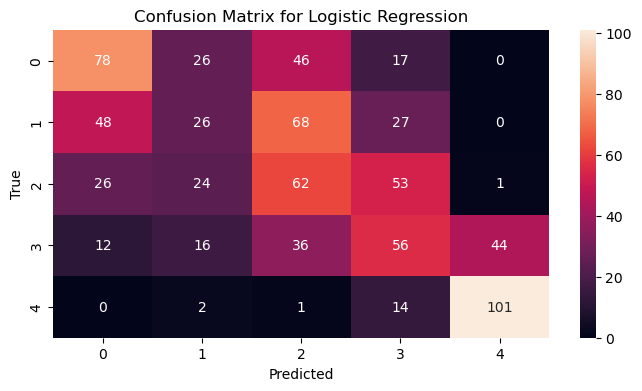

-------------------------------------------------the outcome of KNN-------------------------------------------------
Accuracy: 0.28
F1 Score: 0.23
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.26      0.35       167
           2       0.50      0.02      0.05       169
           3       0.25      0.20      0.22       166
           4       0.15      0.16      0.15       164
           5       0.29      0.93      0.44       118

    accuracy                           0.28       784
   macro avg       0.35      0.32      0.24       784
weighted avg       0.35      0.28      0.23       784



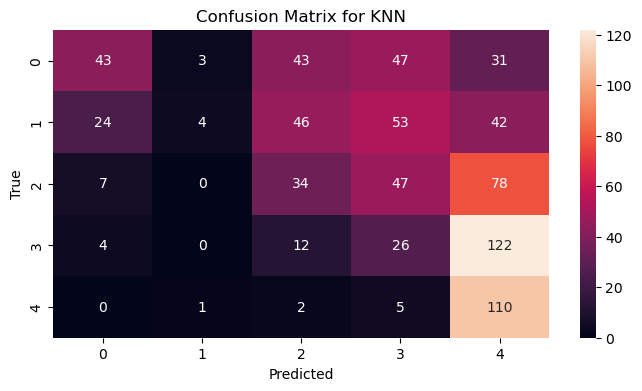

-------------------------------------------------the outcome of GradientBoosting-------------------------------------------------
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       169
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       164
           5       1.00      1.00      1.00       118

    accuracy                           1.00       784
   macro avg       1.00      1.00      1.00       784
weighted avg       1.00      1.00      1.00       784



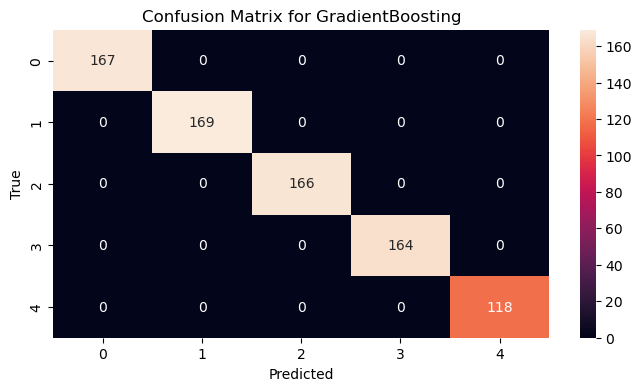

-------------------------------------------------the outcome of Random Forest-------------------------------------------------
Accuracy: 0.93
F1 Score: 0.93
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       167
           2       0.95      0.92      0.93       169
           3       0.86      0.91      0.89       166
           4       0.92      0.85      0.89       164
           5       0.94      0.99      0.97       118

    accuracy                           0.93       784
   macro avg       0.93      0.93      0.93       784
weighted avg       0.93      0.93      0.93       784



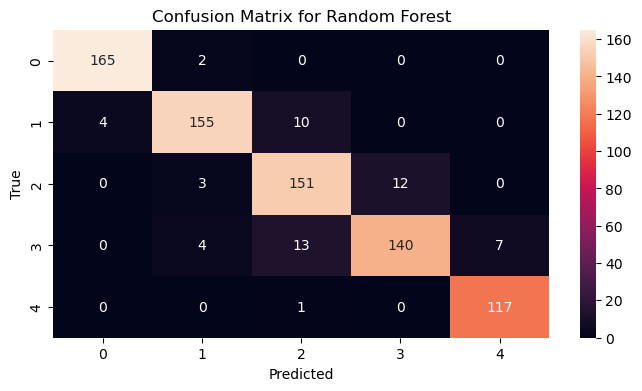

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

X = pd.get_dummies(df.drop(columns=["name","roi_cat","score_cat",'votes_cat']))
y = df["roi_cat"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)


    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred, average="weighted"), 2)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(
        f"-------------------------------------------------the outcome of {name}-------------------------------------------------"
    )
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:")
    print(report)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

X = pd.get_dummies(df.drop(columns=["name","roi_cat","score_cat",'votes_cat']))
y = df["score_cat"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

smote = SMOTE(random_state=42,k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)


    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred, average="weighted"), 2)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(
        f"-------------------------------------------------the outcome of {name}-------------------------------------------------"
    )
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:")
    print(report)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

X = pd.get_dummies(df.drop(columns=["name","roi_cat","score_cat","votes_cat"]))
y = df["votes_cat"]   
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

smote = SMOTE(random_state=42,k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)


    accuracy = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred, average="weighted"), 2)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(
        f"-------------------------------------------------the outcome of {name}-------------------------------------------------"
    )
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:")
    print(report)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

#### Use best moddel to get predicted tagert value and data set

In [ ]:
X = pd.get_dummies(df.drop(columns=["name","roi_cat","score_cat",'votes_cat']))
y_roi_cat = df["roi_cat"]
y_score_cat = df["score_cat"]
y_votes_cat = df["votes_cat"]

X_train, X_test, y_roi_cat_train, y_roi_cat_test, y_score_cat_train, y_score_cat_test, y_votes_cat_train, y_votes_cat_test = train_test_split(X, y_roi_cat, y_score_cat, y_votes_cat, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_roi_cat_train)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  
models = {
    "Random Forest": RandomForestClassifier()
}

list_y_pred_roi_cat = []

for name, model in models.items():
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    list_y_pred_roi_cat.append(y_pred)

    accuracy = round(accuracy_score(y_roi_cat_test, y_pred), 2)
    f1 = round(f1_score(y_roi_cat_test, y_pred, average="weighted"), 2)
    report = classification_report(y_roi_cat_test, y_pred)
    cm = confusion_matrix(y_roi_cat_test, y_pred, labels=model.classes_)
    print(
        f"-------------------------------------------------the outcome of {name}-------------------------------------------------"
    )
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:")
    print(report)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [ ]:
### from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score


smote = SMOTE(random_state=42,k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_score_cat_train)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  
models = {
    "Random Forest": RandomForestClassifier()
}

list_y_pred_score_cat = []

for name, model in models.items():
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    list_y_pred_score_cat.append(y_pred)

    accuracy = round(accuracy_score(y_score_cat_test, y_pred), 2)
    f1 = round(f1_score(y_score_cat_test, y_pred, average="weighted"), 2)
    report = classification_report(y_score_cat_test, y_pred)
    cm = confusion_matrix(y_score_cat_test, y_pred, labels=model.classes_)
    print(
        f"-------------------------------------------------the outcome of {name}-------------------------------------------------"
    )
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:")
    print(report)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [ ]:
### from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score


smote = SMOTE(random_state=42,k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_votes_cat_train)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)  
models = {
    "Random Forest": RandomForestClassifier()
}

list_y_pred_votes_cat = []

for name, model in models.items():
    model.fit(X_train_scaled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    list_y_pred_votes_cat.append(y_pred)

    accuracy = round(accuracy_score(y_votes_cat_test, y_pred), 2)
    f1 = round(f1_score(y_votes_cat_test, y_pred, average="weighted"), 2)
    report = classification_report(y_votes_cat_test, y_pred)
    cm = confusion_matrix(y_votes_cat_test, y_pred, labels=model.classes_)
    print(
        f"-------------------------------------------------the outcome of {name}-------------------------------------------------"
    )
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:")
    print(report)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cbar=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [ ]:
y_pred_roi_cat = pd.Series(list_y_pred_roi_cat[0])
y_roi_cat = pd.concat([y_roi_cat_train, y_pred_roi_cat])

y_pred_score_cat = pd.Series(list_y_pred_score_cat[0])
y_score_cat = pd.concat([y_score_cat_train, y_pred_score_cat])

y_pred_votes_cat = pd.Series(list_y_pred_votes_cat[0])
y_votes_cat = pd.concat([y_votes_cat_train, y_pred_votes_cat])

X_new = pd.concat([X_train, X_test])

In [ ]:
X_new = X_new.reset_index(drop=True)
y_votes_cat = y_votes_cat.reset_index(drop=True)
y_score_cat = y_score_cat.reset_index(drop=True)
y_roi_cat = y_roi_cat.reset_index(drop=True)

In [ ]:
df_new = X_new.copy()
df_new['roi_cat'] = y_roi_cat
df_new['score_cat'] = y_score_cat
df_new['votes_cat'] = y_votes_cat

In [ ]:
print('the final dataframe')
df_new

In [ ]:
df_new[["roi_cat", "score_cat", "votes_cat"]].describe()
df_new[["roi", "score", "votes"]].describe()